## Business Problem

# import libraries

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style
from warnings import filterwarnings
filterwarnings('ignore')

# read data set

In [106]:
df = pd.read_csv(r'supply_train.csv')
df.head()

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0           0     WH_100000     EID_50000         Urban            Small   
1           1     WH_100001     EID_50001         Rural            Large   
2           2     WH_100002     EID_50002         Rural              Mid   
3           3     WH_100003     EID_50003         Rural              Mid   
4           4     WH_100004     EID_50004         Rural            Large   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0   West           Zone 6                   3                    1   
1  North           Zone 5                   0                    0   
2  South           Zone 2                   1                    0   
3  North           Zone 3                   7                    4   
4  North           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [107]:
# to drop first column

df.drop('Unnamed: 0',axis =1, inplace = True)

In [108]:
pd.options.display.max_columns = None
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [109]:
df.shape

(16620, 24)

In [110]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

## Descriptive Details

In [111]:
df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        16620.000000         16620.000000       16620.000000   
mean             4.126655             0.780927           3.103129   
std              2.606241             1.206351           1.147711   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     16620.000000     16620.000000    16620.000000  16620.000000   
mean       4983.904994        42.473706        0.096871      0.056017   
std        1051.032239        16.090000        0.295791      0.229961   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4309.000000        29.000000        0.000000      0.000000   
50%        4856.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num  wh_est_year  \
count     16620.000000   16620.000000  15953.000000  8760.000000   
mean          0.655716     163.521901     28.911490  2009.345320   
std           0.475149      62.701193      7.842046     7.544672   
min           0.000000      55.000000     10.000000  1996.000000   
25%           0.000000     109.000000     24.000000  2003.000000   
50%           1.000000     164.000000     28.000000  2009.000000   
75%           1.000000     218.000000     33.000000  2016.000000   
max           1.000000     271.000000     98.000000  2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                16620.000000   16620.000000      16620.000000   
mean                    17.127196       0.306137          3.491095   
std                      9.163901       0.460901          1.688614   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    16620.000000    16620.000000  
mean        18.727377    22098.420096  
std          8.619857    11620.337346  
min          1.000000     2093.000000  
25%         11.000000    13057.000000  
50%         19.000000    22099.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

## Understanding of attributes

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

# EDA

### unique values

In [113]:
df.Ware_house_ID.nunique()

16620

In [114]:
df.WH_Manager_ID.nunique()

16620

In [115]:
df.drop(['Ware_house_ID','WH_Manager_ID'],axis = 1 , inplace = True)

In [116]:
df.head()

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   
3         Rural              Mid  North           Zone 3                   7   
4         Rural            Large  North           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   
2                    0                  4             4306  Company Owned   
3                    4                  2             6000         Rented   
4                    1                  2             4740  Company Owned   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               24               0            1                1   
1               47               0            0                1   
2               64               0            0                0   
3               50               0            0                0   
4               42               1            0                1   

   dist_from_hub  workers_num  wh_est_year  storage_issue_reported_l3m  \
0             91         29.0          NaN                          13   
1            210         31.0          NaN                           4   
2            161         37.0          NaN                          17   
3            103         21.0          NaN                          17   
4            112         25.0       2009.0                          18   

   temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0              0                            A                 5   
1              0                            A                 3   
2              0                            A                 6   
3              1                           A+                 3   
4              0                            C                 6   

   govt_check_l3m  product_wg_ton  
0              15           17115  
1              17            5074  
2              22           23137  
3              27           22115  
4              24           24071

## missing values

In [117]:
df.isnull().sum()*100/len(df)

Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      4.013237
wh_est_year                     47.292419
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.604091
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0.000000
dtype: float64

In [118]:
# we can drop the warehous estimated feature as there is 47% missing data and there is no need to predict dependent variable

df.drop(['wh_est_year'],axis = 1 ,inplace = True)

In [119]:
# the missing value in 'approved_wh_govt_certificate' are low so we can use mode value to fill as it is a categorical variable

df.approved_wh_govt_certificate.fillna(df.approved_wh_govt_certificate.mode()[0],inplace = True)

In [120]:
# missing value in 'workers_num' is low . so we can use 'mean' value to fill as it is a numerical value

df.workers_num.fillna(df.workers_num.mean(),inplace = True)

In [121]:
# now the missing values completely eradicated
df.isnull().sum()*100/len(df)

Location_type                   0.0
WH_capacity_size                0.0
zone                            0.0
WH_regional_zone                0.0
num_refill_req_l3m              0.0
transport_issue_l1y             0.0
Competitor_in_mkt               0.0
retail_shop_num                 0.0
wh_owner_type                   0.0
distributor_num                 0.0
flood_impacted                  0.0
flood_proof                     0.0
electric_supply                 0.0
dist_from_hub                   0.0
workers_num                     0.0
storage_issue_reported_l3m      0.0
temp_reg_mach                   0.0
approved_wh_govt_certificate    0.0
wh_breakdown_l3m                0.0
govt_check_l3m                  0.0
product_wg_ton                  0.0
dtype: float64

## duplicate values

In [122]:
df.duplicated().sum()

np.int64(0)

## Variable Transformation :Converting Datatypes

In [123]:
before = df.dtypes
before

Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [124]:
# converting dtypes using astype
df["Location_type"] = df["Location_type"].astype('category')
df["WH_capacity_size"] = df["WH_capacity_size"].astype('category')
df["zone"] = df["zone"].astype('category')
df["WH_regional_zone"] = df["WH_regional_zone"].astype('category')
df["wh_owner_type"] = df["wh_owner_type"].astype('category')
df["approved_wh_govt_certificate"] = df["approved_wh_govt_certificate"].astype('category')

In [125]:
after = df.dtypes
after

Location_type                   category
WH_capacity_size                category
zone                            category
WH_regional_zone                category
num_refill_req_l3m                 int64
transport_issue_l1y                int64
Competitor_in_mkt                  int64
retail_shop_num                    int64
wh_owner_type                   category
distributor_num                    int64
flood_impacted                     int64
flood_proof                        int64
electric_supply                    int64
dist_from_hub                      int64
workers_num                      float64
storage_issue_reported_l3m         int64
temp_reg_mach                      int64
approved_wh_govt_certificate    category
wh_breakdown_l3m                   int64
govt_check_l3m                     int64
product_wg_ton                     int64
dtype: object

# Univariate Analysis

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 16620 non-null  category
 1   WH_capacity_size              16620 non-null  category
 2   zone                          16620 non-null  category
 3   WH_regional_zone              16620 non-null  category
 4   num_refill_req_l3m            16620 non-null  int64   
 5   transport_issue_l1y           16620 non-null  int64   
 6   Competitor_in_mkt             16620 non-null  int64   
 7   retail_shop_num               16620 non-null  int64   
 8   wh_owner_type                 16620 non-null  category
 9   distributor_num               16620 non-null  int64   
 10  flood_impacted                16620 non-null  int64   
 11  flood_proof                   16620 non-null  int64   
 12  electric_supply               16620 non-null  

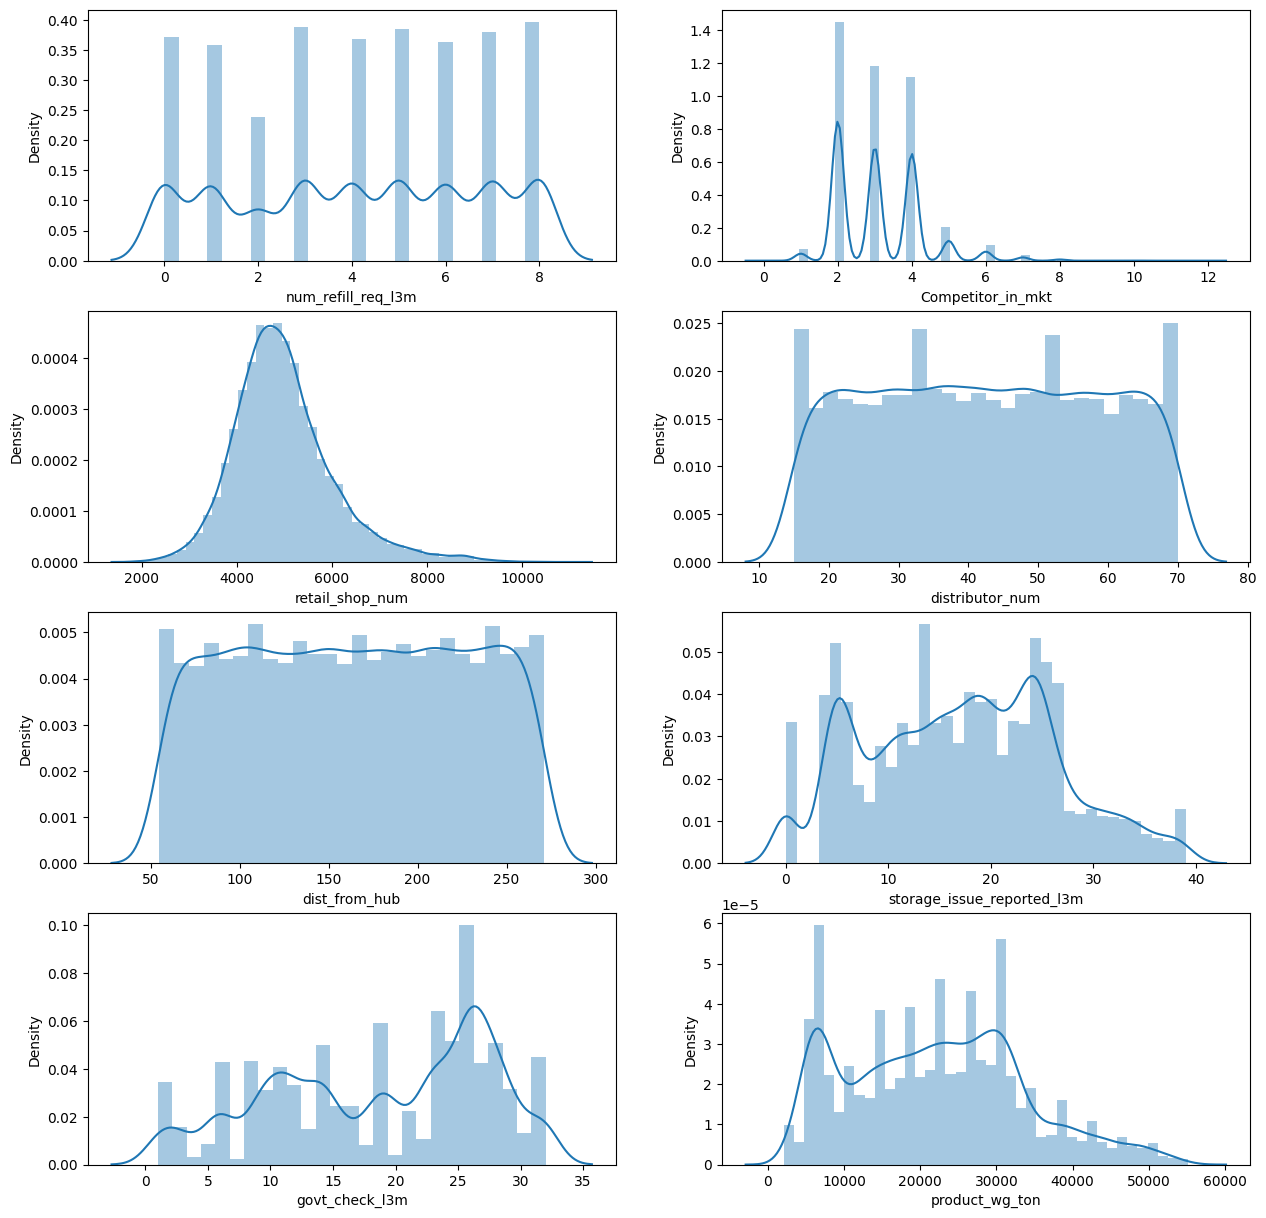

In [127]:
# check numerial values
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.distplot(df['num_refill_req_l3m'],kde=True, ax=axes[0][0])
sns.distplot(df['Competitor_in_mkt'] , kde=True, ax=axes[0][1])
sns.distplot(df['retail_shop_num'] , kde=True, ax=axes[1][0])
sns.distplot(df['distributor_num'] , kde=True, ax=axes[1][1])
sns.distplot(df['dist_from_hub'] , kde=True, ax=axes[2][0])
sns.distplot(df['storage_issue_reported_l3m'] , kde=True, ax=axes[2][1])
sns.distplot(df['govt_check_l3m'] , kde=True, ax=axes[3][0])
sns.distplot(df['product_wg_ton'] , kde=True, ax=axes[3][1])
plt.show()

<Axes: xlabel='workers_num', ylabel='Density'>

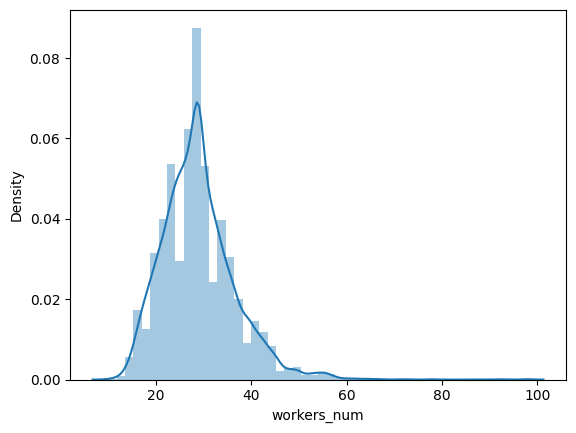

In [128]:
sns.distplot(df['workers_num'] , kde=True)


<Axes: xlabel='product_wg_ton'>

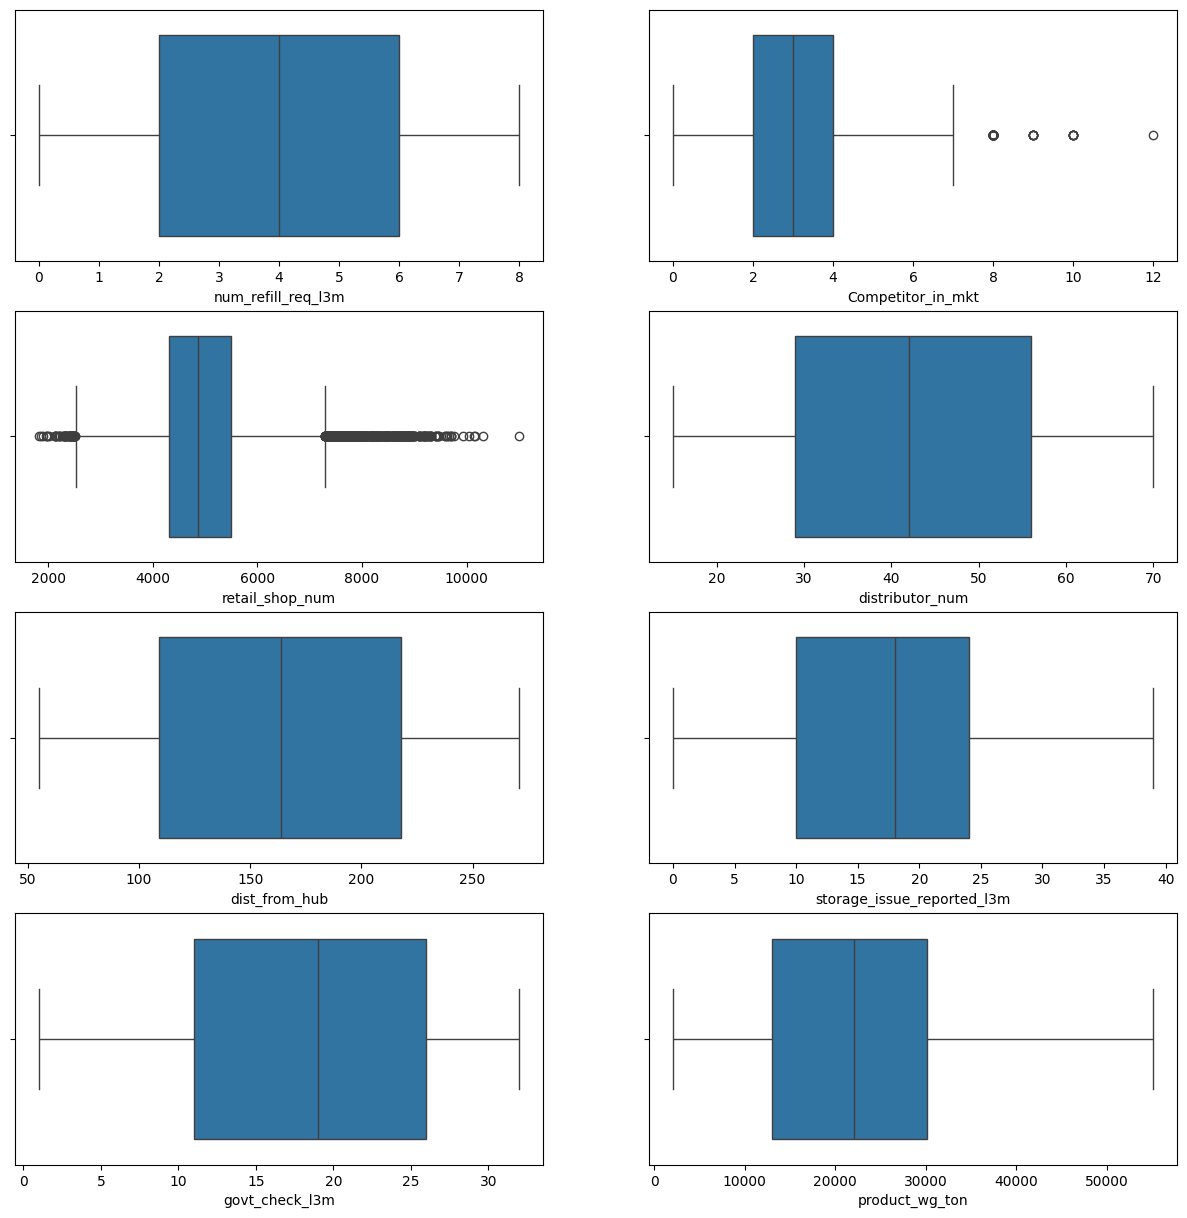

In [129]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x='num_refill_req_l3m', data=df, ax=axes[0][0])
sns.boxplot(x='Competitor_in_mkt', data=df, ax=axes[0][1])
sns.boxplot(x='retail_shop_num', data=df, ax=axes[1][0])
sns.boxplot(x='distributor_num', data=df, ax=axes[1][1])
sns.boxplot(x='dist_from_hub', data=df, ax=axes[2][0])
sns.boxplot(x='storage_issue_reported_l3m', data=df, ax=axes[2][1])
sns.boxplot(x='govt_check_l3m', data=df, ax=axes[3][0])
sns.boxplot(x='product_wg_ton', data=df, ax=axes[3][1]) 

<Axes: xlabel='workers_num'>

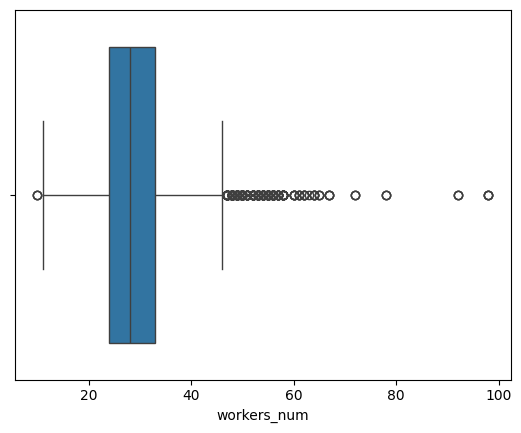

In [130]:
sns.boxplot(x='workers_num', data=df)

<Axes: xlabel='wh_breakdown_l3m', ylabel='count'>

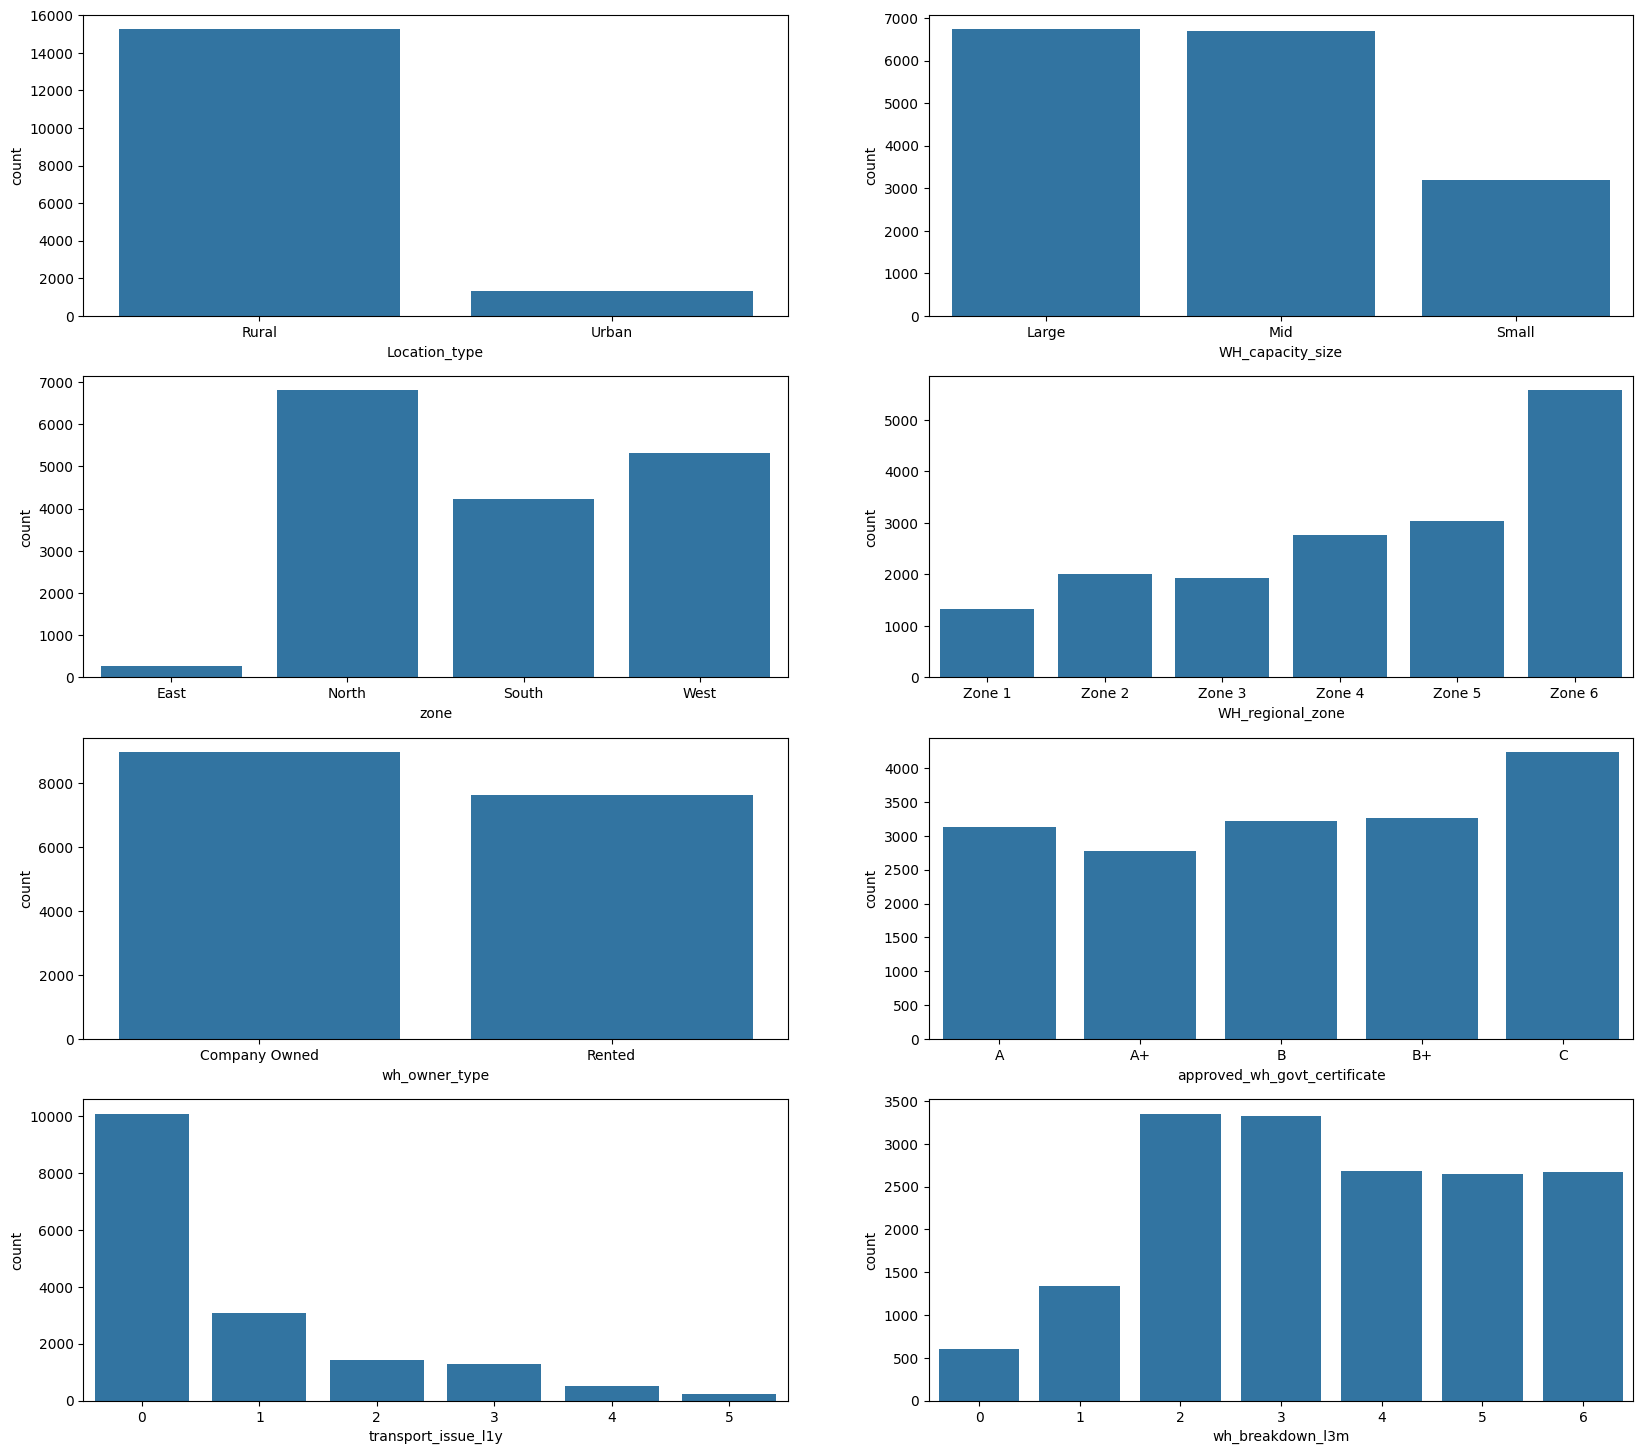

In [131]:
# check category
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.countplot(x='Location_type', data=df, ax=axes[0][0])
sns.countplot(x='WH_capacity_size', data=df, ax=axes[0][1])
sns.countplot(x='zone', data=df, ax=axes[1][0])
sns.countplot(x='WH_regional_zone', data=df, ax=axes[1][1])
sns.countplot(x='wh_owner_type', data=df, ax=axes[2][0])
sns.countplot(x='approved_wh_govt_certificate', data=df, ax=axes[2][1])
sns.countplot(x='transport_issue_l1y', data=df, ax=axes[3][0])
sns.countplot(x='wh_breakdown_l3m', data=df, ax=axes[3][1])

# Bivariate analysis

<Axes: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

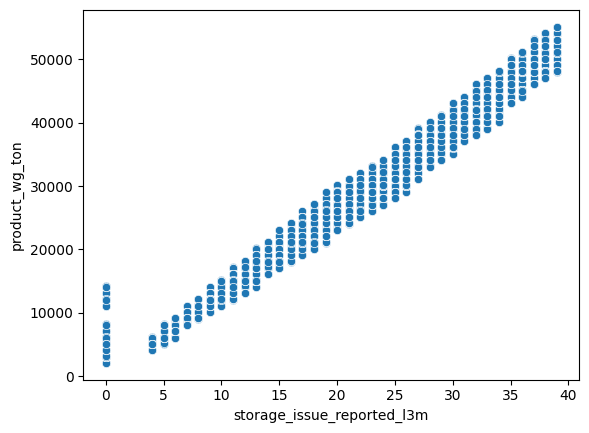

In [132]:
sns.scatterplot(x='storage_issue_reported_l3m', y="product_wg_ton", data=df)

<Axes: xlabel='workers_num', ylabel='product_wg_ton'>

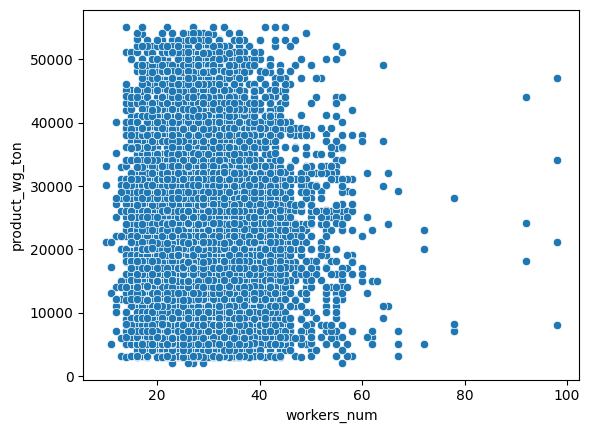

In [133]:
sns.scatterplot(x='workers_num', y="product_wg_ton", data=df)

<Axes: xlabel='Location_type', ylabel='retail_shop_num'>

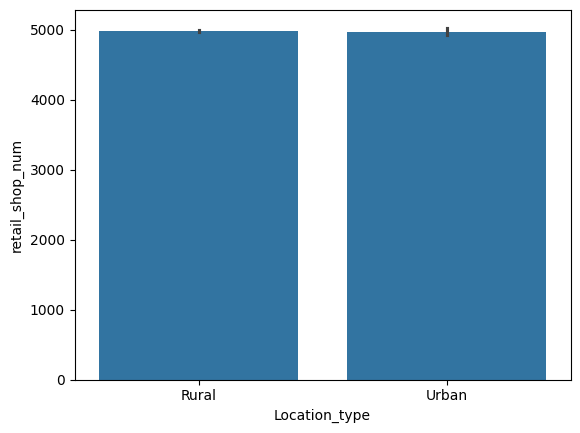

In [134]:
sns.barplot(x='Location_type',y='retail_shop_num', data=df)

<Axes: xlabel='zone', ylabel='retail_shop_num'>

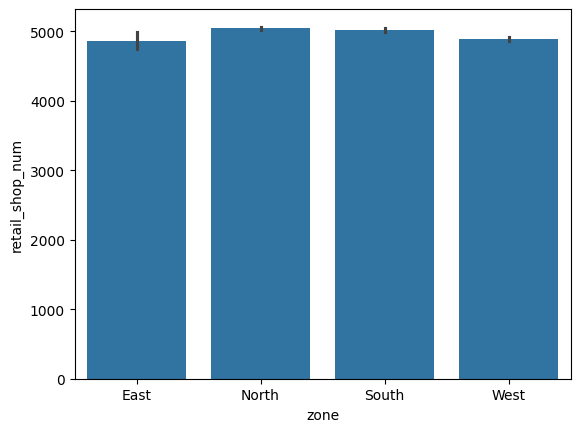

In [135]:
sns.barplot(x='zone',y='retail_shop_num', data=df)

<Axes: xlabel='zone', ylabel='storage_issue_reported_l3m'>

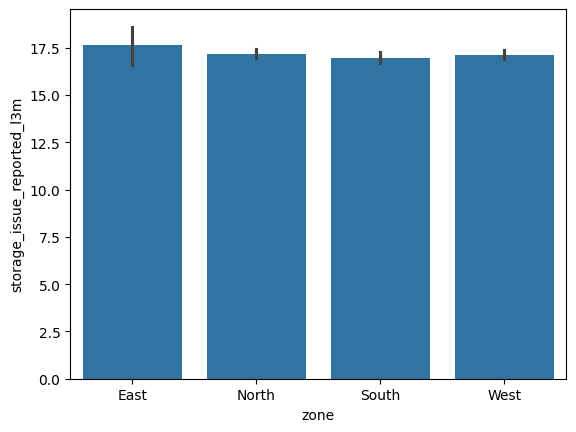

In [136]:
sns.barplot(x='zone',y='storage_issue_reported_l3m', data=df)

<Axes: xlabel='flood_impacted', ylabel='count'>

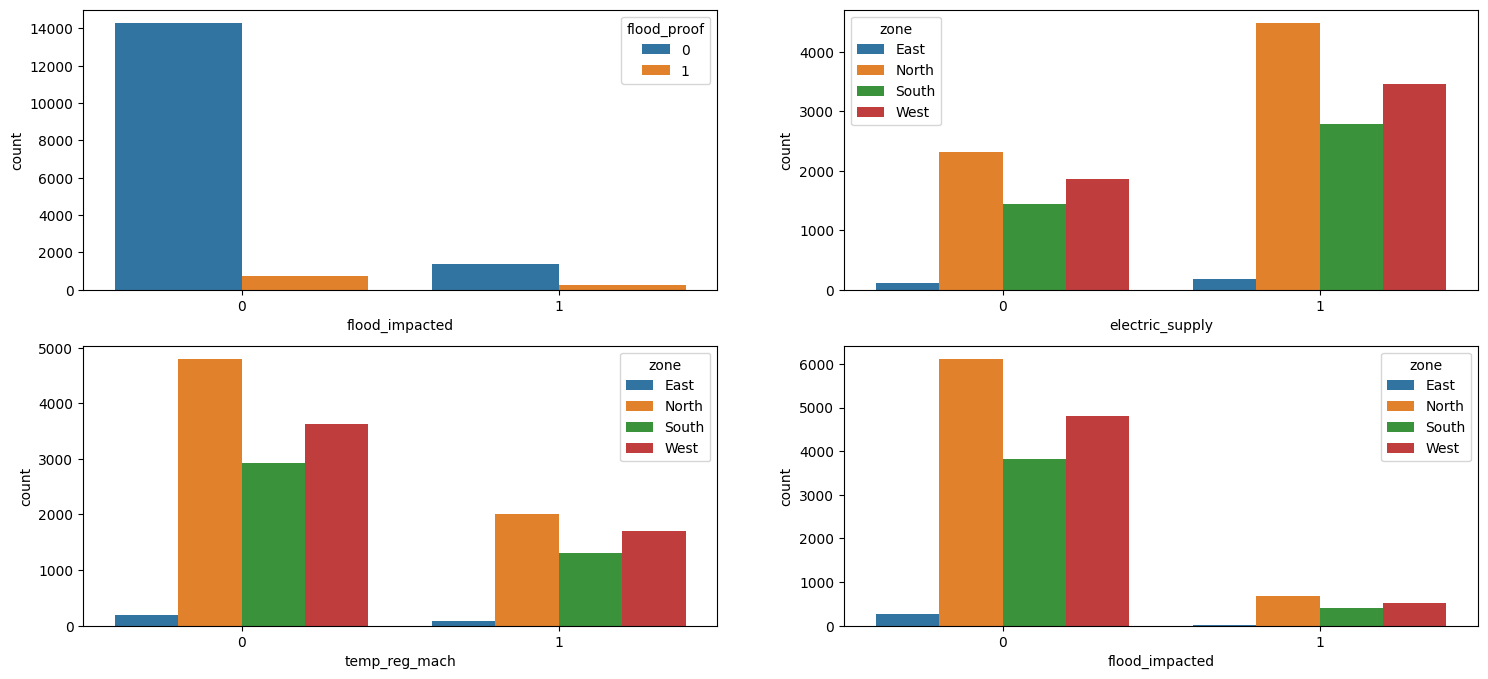

In [137]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.countplot(x='flood_impacted',hue='flood_proof', data=df, ax=axes[0][0])
sns.countplot(x='electric_supply',hue='zone', data=df, ax=axes[0][1])
sns.countplot(x='temp_reg_mach',hue='zone', data=df, ax=axes[1][0])
sns.countplot(x='flood_impacted',hue='zone', data=df, ax=axes[1][1])

<Axes: xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

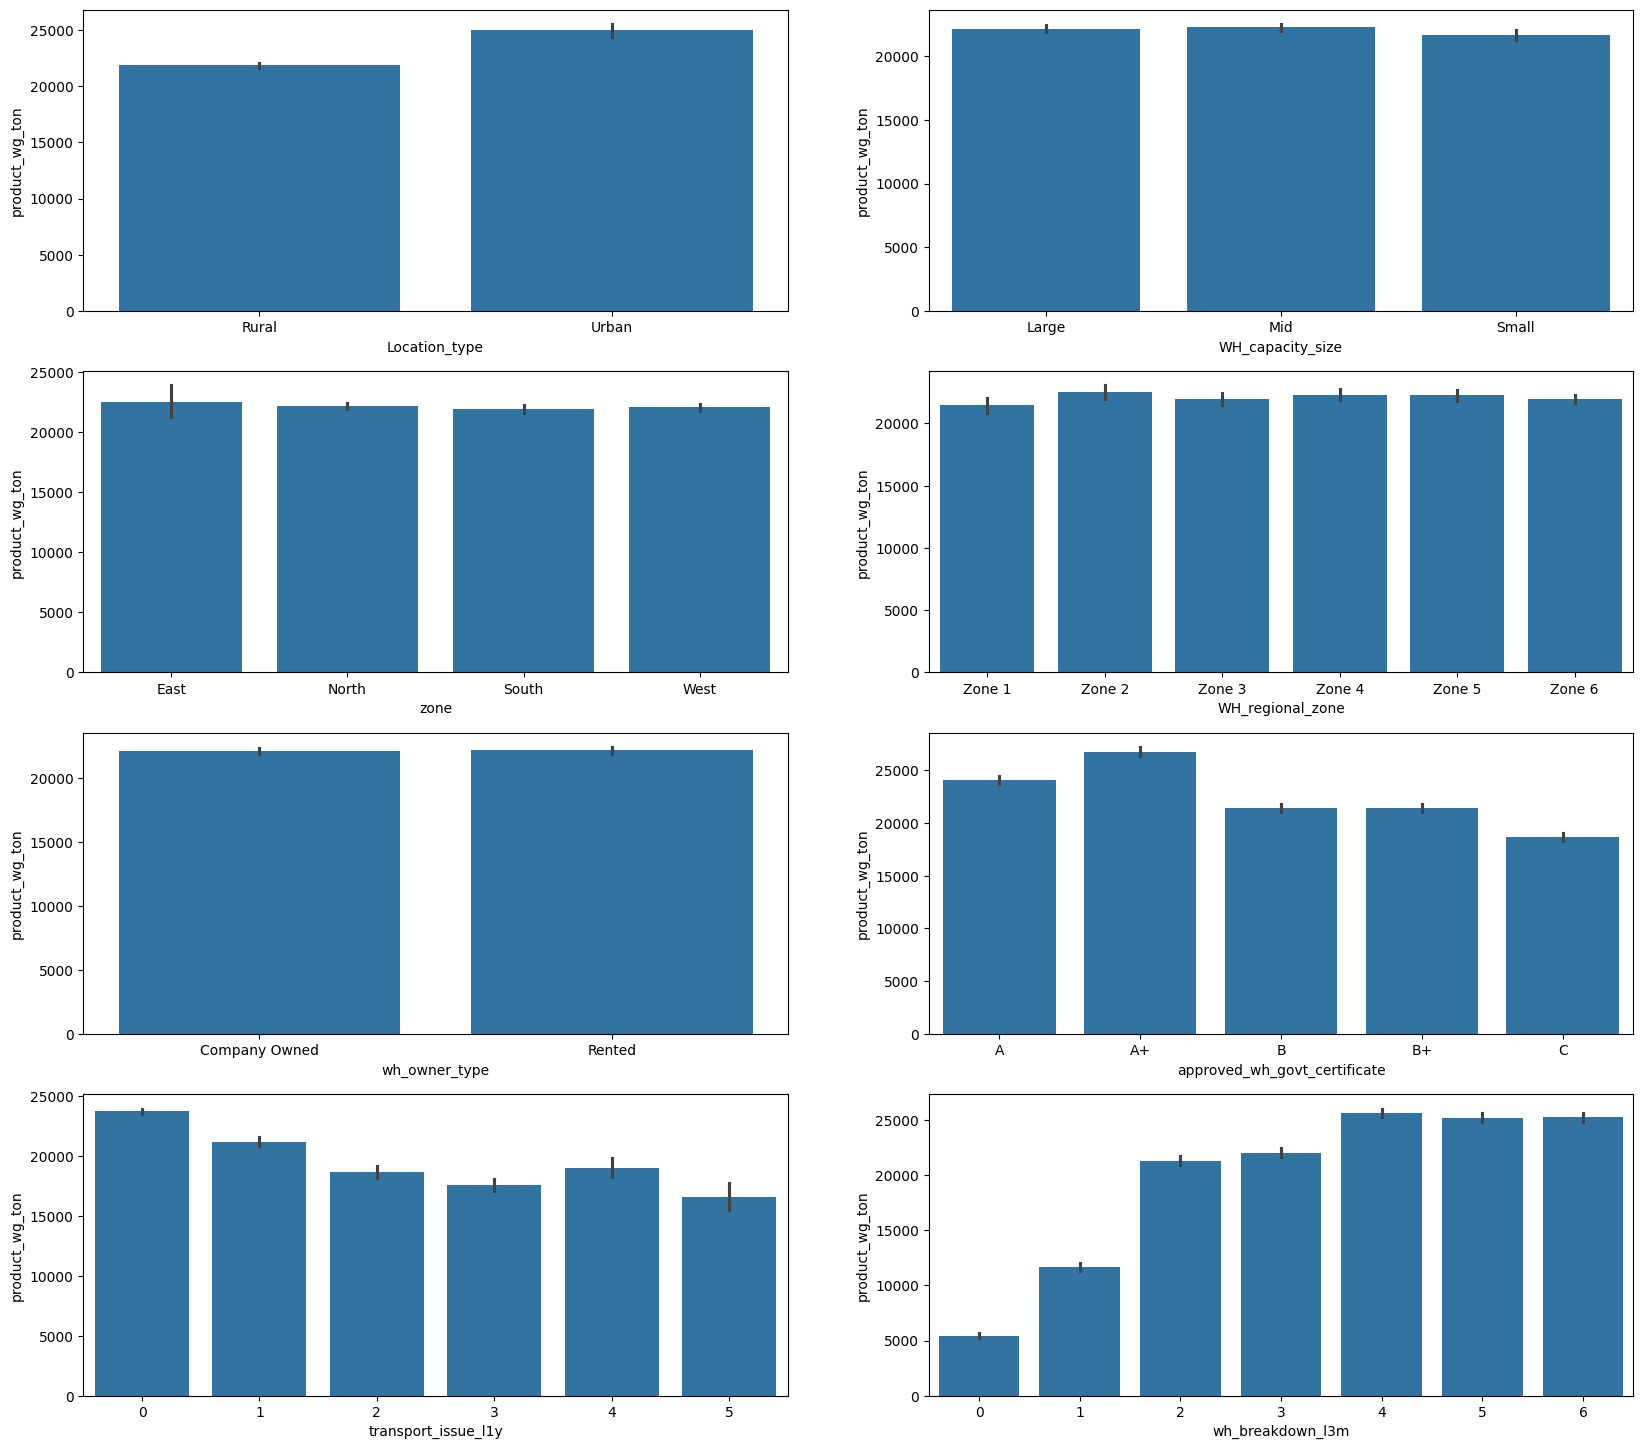

In [138]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.barplot(x='Location_type',y='product_wg_ton', data=df, ax=axes[0][0])
sns.barplot(x='WH_capacity_size',y='product_wg_ton', data=df, ax=axes[0][1])
sns.barplot(x='zone',y='product_wg_ton', data=df, ax=axes[1][0])
sns.barplot(x='WH_regional_zone',y='product_wg_ton', data=df, ax=axes[1][1])
sns.barplot(x='wh_owner_type',y='product_wg_ton', data=df, ax=axes[2][0])
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df, ax=axes[2][1])
sns.barplot(x='transport_issue_l1y',y='product_wg_ton', data=df, ax=axes[3][0])
sns.barplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df, ax=axes[3][1])

<Axes: xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

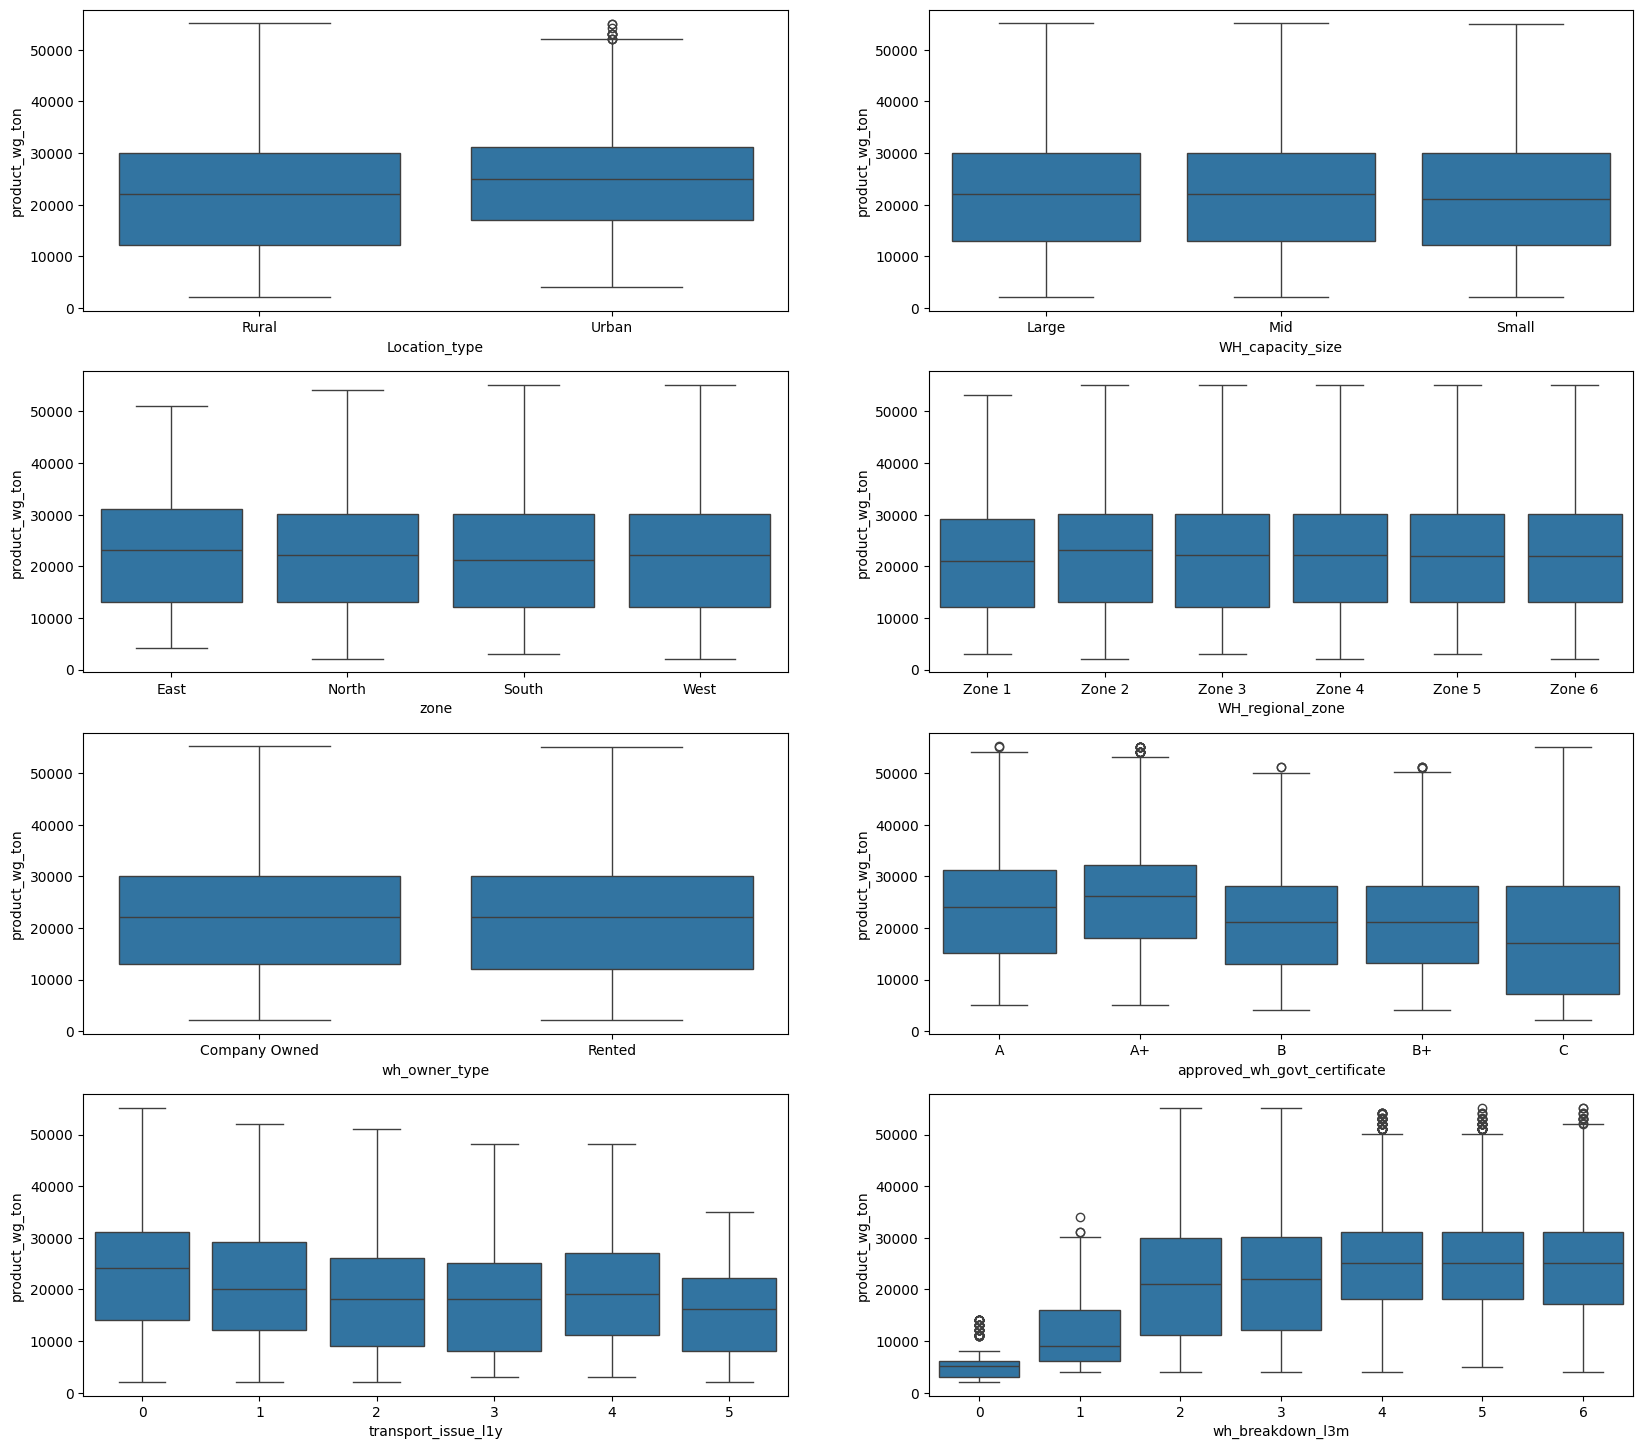

In [139]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.boxplot(x='Location_type',y='product_wg_ton', data=df, ax=axes[0][0])
sns.boxplot(x='WH_capacity_size',y='product_wg_ton', data=df, ax=axes[0][1])
sns.boxplot(x='zone',y='product_wg_ton', data=df, ax=axes[1][0])
sns.boxplot(x='WH_regional_zone',y='product_wg_ton', data=df, ax=axes[1][1])
sns.boxplot(x='wh_owner_type',y='product_wg_ton', data=df, ax=axes[2][0])
sns.boxplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df, ax=axes[2][1])
sns.boxplot(x='transport_issue_l1y',y='product_wg_ton', data=df, ax=axes[3][0])
sns.boxplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df, ax=axes[3][1])

# Multivariate analysis

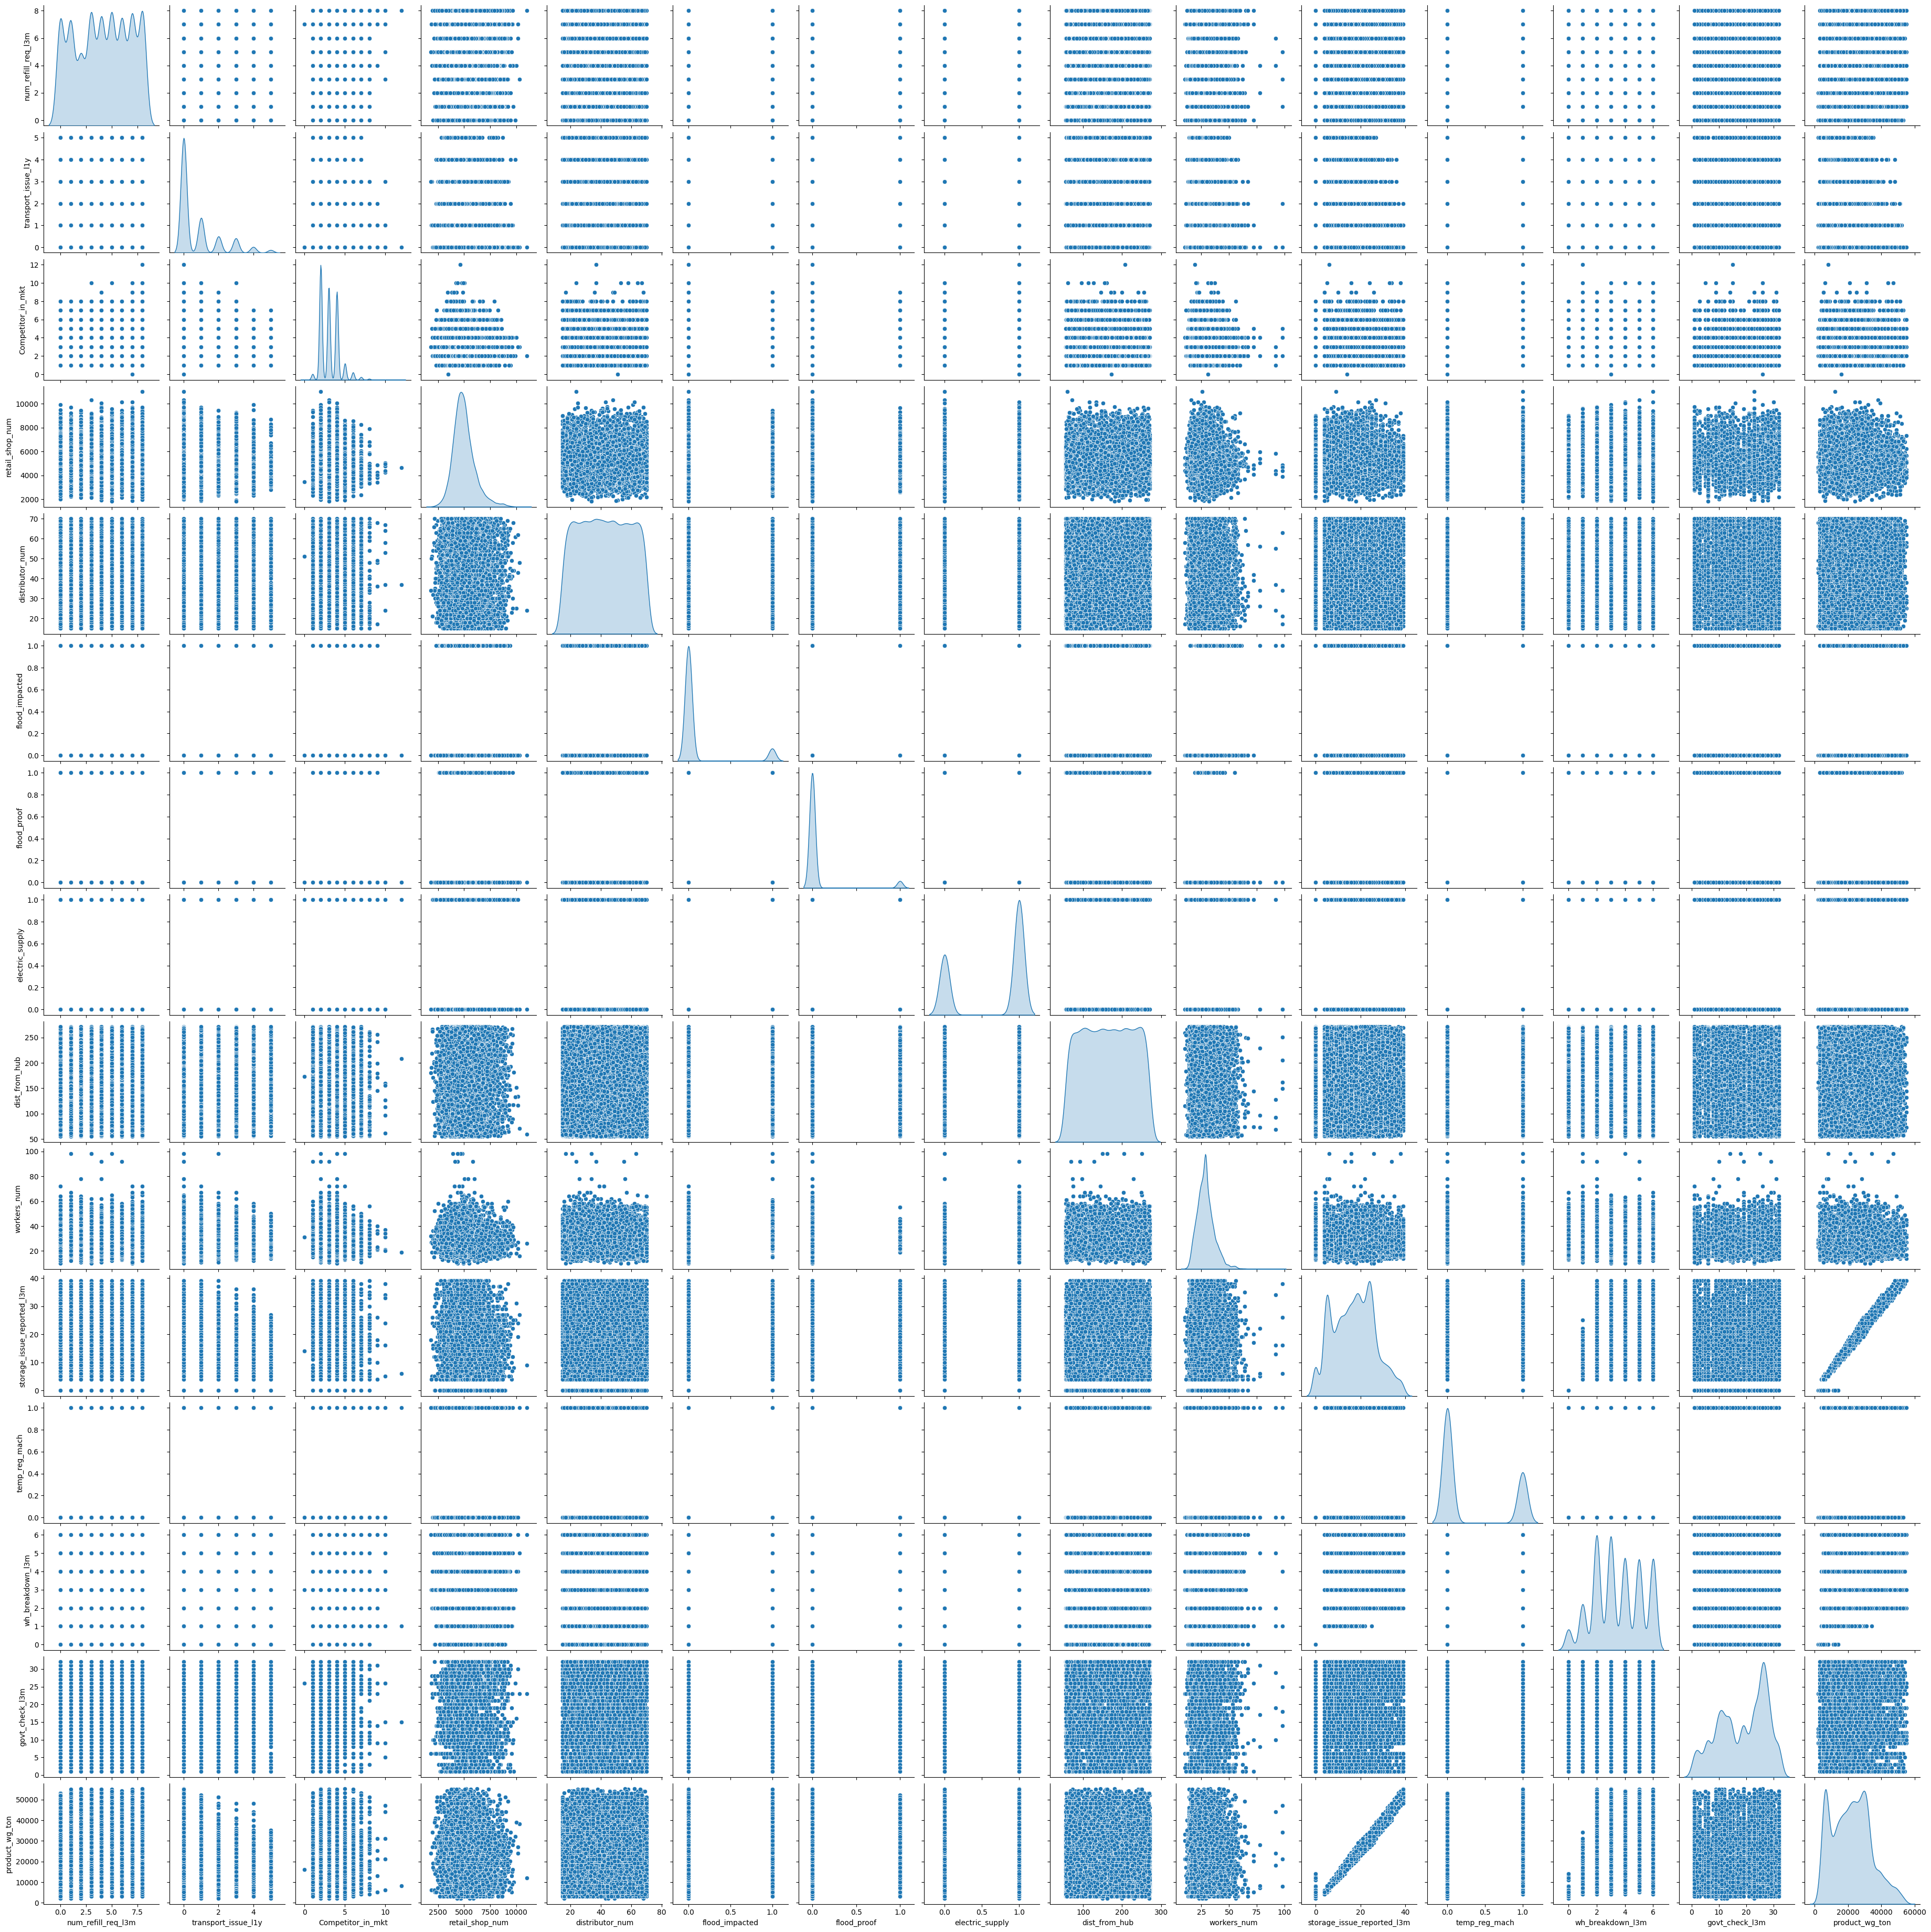

In [140]:
sns.pairplot(df,diag_kind='kde')
plt.show()

# heat map

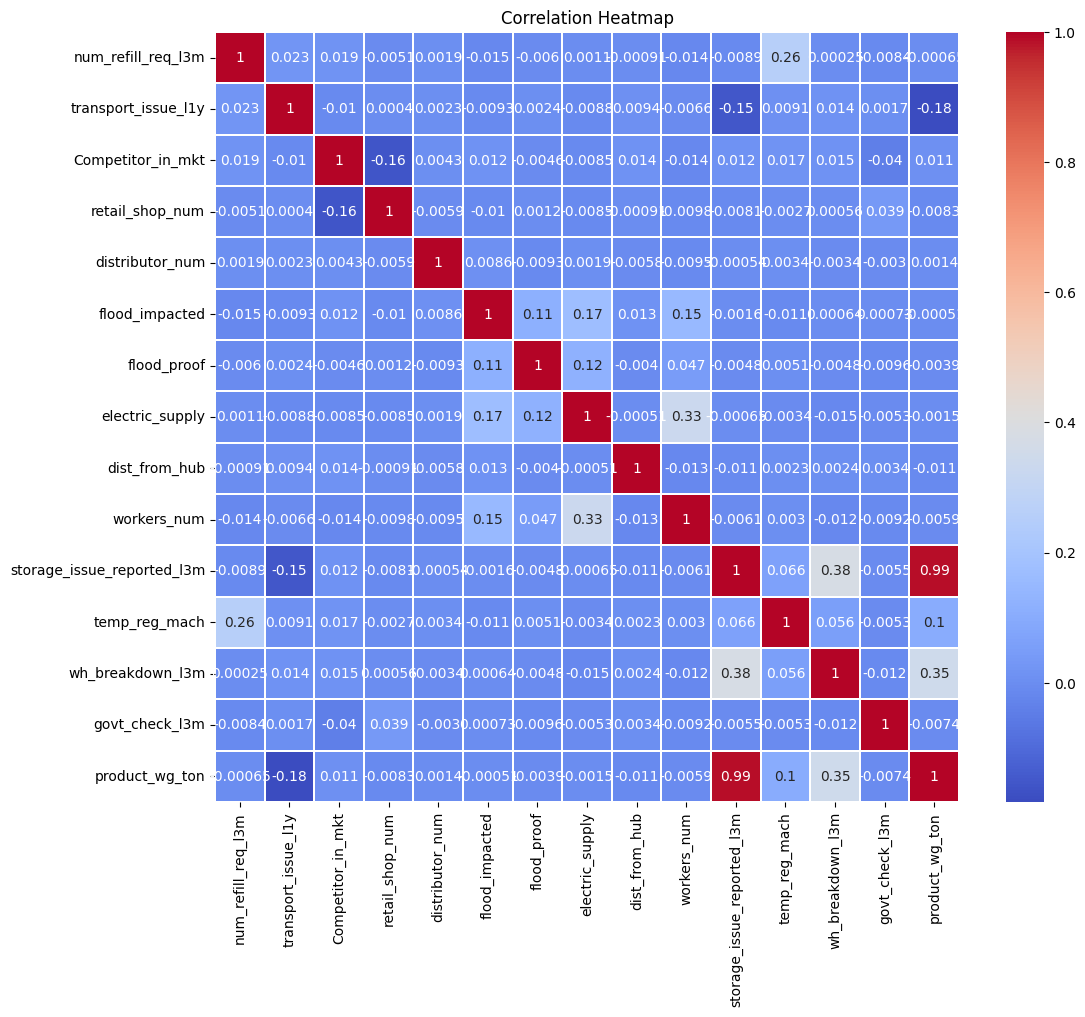

In [141]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.10)
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

# Feature Engineering

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 16620 non-null  category
 1   WH_capacity_size              16620 non-null  category
 2   zone                          16620 non-null  category
 3   WH_regional_zone              16620 non-null  category
 4   num_refill_req_l3m            16620 non-null  int64   
 5   transport_issue_l1y           16620 non-null  int64   
 6   Competitor_in_mkt             16620 non-null  int64   
 7   retail_shop_num               16620 non-null  int64   
 8   wh_owner_type                 16620 non-null  category
 9   distributor_num               16620 non-null  int64   
 10  flood_impacted                16620 non-null  int64   
 11  flood_proof                   16620 non-null  int64   
 12  electric_supply               16620 non-null  

In [143]:
df.head()

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   
3         Rural              Mid  North           Zone 3                   7   
4         Rural            Large  North           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   
2                    0                  4             4306  Company Owned   
3                    4                  2             6000         Rented   
4                    1                  2             4740  Company Owned   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               24               0            1                1   
1               47               0            0                1   
2               64               0            0                0   
3               50               0            0                0   
4               42               1            0                1   

   dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0             91         29.0                          13              0   
1            210         31.0                           4              0   
2            161         37.0                          17              0   
3            103         21.0                          17              1   
4            112         25.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [144]:
# here 'WH_regional_zone' converted into numerical type by slicing the zone in it
df['WH_regional_zone' ]=df['WH_regional_zone'].apply(lambda x: x[-1],)
df.WH_regional_zone=pd.to_numeric(df.WH_regional_zone)

In [145]:
#to check
df.head(2)

Location_type WH_capacity_size   zone  WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West                 6                   3   
1         Rural            Large  North                 5                   0   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               24               0            1                1   
1               47               0            0                1   

   dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0             91         29.0                          13              0   
1            210         31.0                           4              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   

   product_wg_ton  
0           17115  
1            5074

### all categorical variables are converted into numerical type using one hote

In [146]:
cat_types_features = df.select_dtypes(include = 'category')
cat_types_features.columns 

Index(['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [147]:
cat_list = ['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate']
cat_list

['Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [148]:
df1 = pd.get_dummies(df,columns = cat_list,prefix = cat_list,drop_first = True)

In [149]:
df1.head()

WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                 6                   3                    1   
1                 5                   0                    0   
2                 2                   1                    0   
3                 3                   7                    4   
4                 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   
2                  4             4306               64               0   
3                  2             6000               50               0   
4                  2             4740               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                          13              0                 5   
1                           4              0                 3   
2                          17              0                 6   
3                          17              1                 3   
4                          18              0                 6   

   govt_check_l3m  product_wg_ton  Location_type_Urban  WH_capacity_size_Mid  \
0              15           17115                 True                 False   
1              17            5074                False                 False   
2              22           23137                False                  True   
3              27           22115                False                  True   
4              24           24071                False                 False   

   WH_capacity_size_Small  zone_North  zone_South  zone_West  \
0                    True       False       False       True   
1                   False        True       False      False   
2                   False       False        True      False   
3                   False        True       False      False   
4                   False        True       False      False   

   wh_owner_type_Rented  approved_wh_govt_certificate_A+  \
0                  True                            False   
1                 False                            False   
2                 False                            False   
3                  True                             True   
4                 False                            False   

   approved_wh_govt_certificate_B  approved_wh_govt_certificate_B+  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   approved_wh_govt_certificate_C  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 16620 non-null  int64  
 1   num_refill_req_l3m               16620 non-null  int64  
 2   transport_issue_l1y              16620 non-null  int64  
 3   Competitor_in_mkt                16620 non-null  int64  
 4   retail_shop_num                  16620 non-null  int64  
 5   distributor_num                  16620 non-null  int64  
 6   flood_impacted                   16620 non-null  int64  
 7   flood_proof                      16620 non-null  int64  
 8   electric_supply                  16620 non-null  int64  
 9   dist_from_hub                    16620 non-null  int64  
 10  workers_num                      16620 non-null  float64
 11  storage_issue_reported_l3m       16620 non-null  int64  
 12  temp_reg_mach     

In [151]:
# Assuming your DataFrame is named df_encoded
boolean_columns = ['Location_type_Urban', 'WH_capacity_size_Mid', 'WH_capacity_size_Small',
                   'zone_North', 'zone_South', 'zone_West', 'wh_owner_type_Rented',
                   'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
                   'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C']

# Convert boolean columns to binary (0/1) columns
df1[boolean_columns] = df1[boolean_columns].astype(int)


In [152]:
df1.head()

WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                 6                   3                    1   
1                 5                   0                    0   
2                 2                   1                    0   
3                 3                   7                    4   
4                 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   
2                  4             4306               64               0   
3                  2             6000               50               0   
4                  2             4740               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                          13              0                 5   
1                           4              0                 3   
2                          17              0                 6   
3                          17              1                 3   
4                          18              0                 6   

   govt_check_l3m  product_wg_ton  Location_type_Urban  WH_capacity_size_Mid  \
0              15           17115                    1                     0   
1              17            5074                    0                     0   
2              22           23137                    0                     1   
3              27           22115                    0                     1   
4              24           24071                    0                     0   

   WH_capacity_size_Small  zone_North  zone_South  zone_West  \
0                       1           0           0          1   
1                       0           1           0          0   
2                       0           0           1          0   
3                       0           1           0          0   
4                       0           1           0          0   

   wh_owner_type_Rented  approved_wh_govt_certificate_A+  \
0                     1                                0   
1                     0                                0   
2                     0                                0   
3                     1                                1   
4                     0                                0   

   approved_wh_govt_certificate_B  approved_wh_govt_certificate_B+  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   approved_wh_govt_certificate_C  
0                               0  
1                               0  
2                               0  
3                               0  
4                               1

In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 16620 non-null  int64  
 1   num_refill_req_l3m               16620 non-null  int64  
 2   transport_issue_l1y              16620 non-null  int64  
 3   Competitor_in_mkt                16620 non-null  int64  
 4   retail_shop_num                  16620 non-null  int64  
 5   distributor_num                  16620 non-null  int64  
 6   flood_impacted                   16620 non-null  int64  
 7   flood_proof                      16620 non-null  int64  
 8   electric_supply                  16620 non-null  int64  
 9   dist_from_hub                    16620 non-null  int64  
 10  workers_num                      16620 non-null  float64
 11  storage_issue_reported_l3m       16620 non-null  int64  
 12  temp_reg_mach     

# correlation after one hot coding

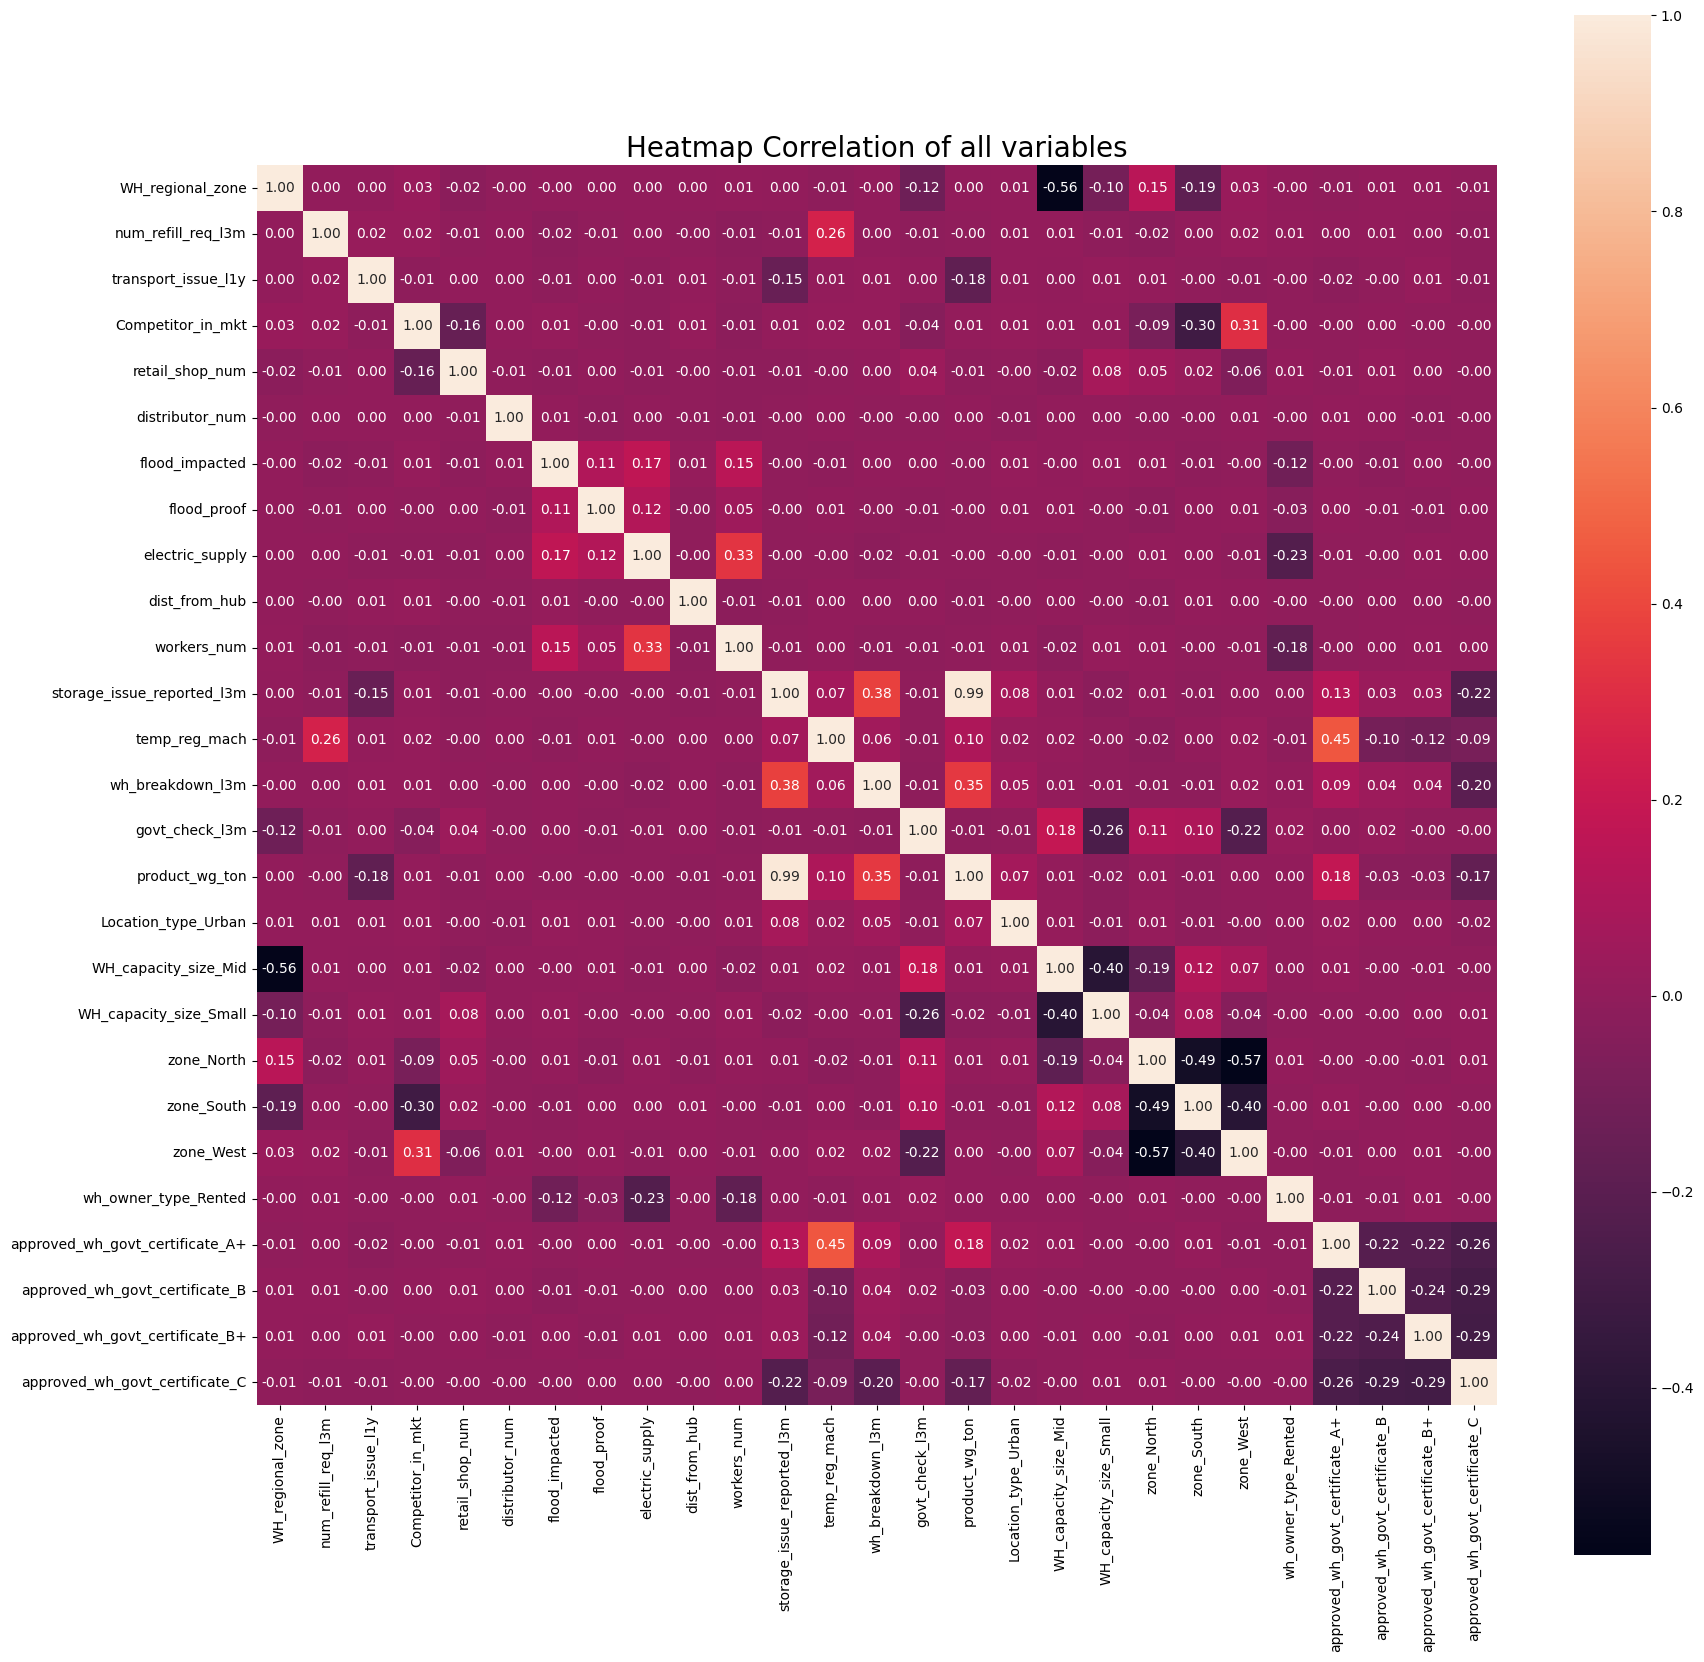

In [154]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df1.corr(),cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Heatmap Correlation of all variables', fontsize = 20,fontweight = 100) # title with fontsize 20
plt.show()

# checking outliers

In [155]:
df1.describe()

WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
count      16620.000000        16620.000000         16620.000000   
mean           4.254392            4.126655             0.780927   
std            1.666568            2.606241             1.206351   
min            1.000000            0.000000             0.000000   
25%            3.000000            2.000000             0.000000   
50%            5.000000            4.000000             0.000000   
75%            6.000000            6.000000             1.000000   
max            6.000000            8.000000             5.000000   

       Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
count       16620.000000     16620.000000     16620.000000    16620.000000   
mean            3.103129      4983.904994        42.473706        0.096871   
std             1.147711      1051.032239        16.090000        0.295791   
min             0.000000      1821.000000        15.000000        0.000000   
25%             2.000000      4309.000000        29.000000        0.000000   
50%             3.000000      4856.000000        42.000000        0.000000   
75%             4.000000      5500.000000        56.000000        0.000000   
max            12.000000     11008.000000        70.000000        1.000000   

        flood_proof  electric_supply  dist_from_hub   workers_num  \
count  16620.000000     16620.000000   16620.000000  16620.000000   
mean       0.056017         0.655716     163.521901     28.911490   
std        0.229961         0.475149      62.701193      7.683065   
min        0.000000         0.000000      55.000000     10.000000   
25%        0.000000         0.000000     109.000000     24.000000   
50%        0.000000         1.000000     164.000000     28.000000   
75%        0.000000         1.000000     218.000000     33.000000   
max        1.000000         1.000000     271.000000     98.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                16620.000000   16620.000000      16620.000000   
mean                    17.127196       0.306137          3.491095   
std                      9.163901       0.460901          1.688614   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  Location_type_Urban  \
count    16620.000000    16620.000000         16620.000000   
mean        18.727377    22098.420096             0.081107   
std          8.619857    11620.337346             0.273008   
min          1.000000     2093.000000             0.000000   
25%         11.000000    13057.000000             0.000000   
50%         19.000000    22099.000000             0.000000   
75%         26.000000    30103.000000             0.000000   
max         32.000000    55151.000000             1.000000   

       WH_capacity_size_Mid  WH_capacity_size_Small    zone_North  \
count          16620.000000            16620.000000  16620.000000   
mean               0.402587                0.191697      0.409146   
std                0.490434                0.393648      0.491691   
min                0.000000                0.000000      0.000000   
25%                0.000000                0.000000      0.000000   
50%                0.000000                0.000000      0.000000   
75%                1.000000                0.000000      1.000000   
max                1.000000                1.000000      1.000000   

         zone_South     zone_West  wh_owner_type_Rented  \
count  16620.000000  16620.000000          16620.000000   
mean       0.254091      0.320096              0.459988   
std        0.435362      0.466527              0.498411   
min        0.000000  

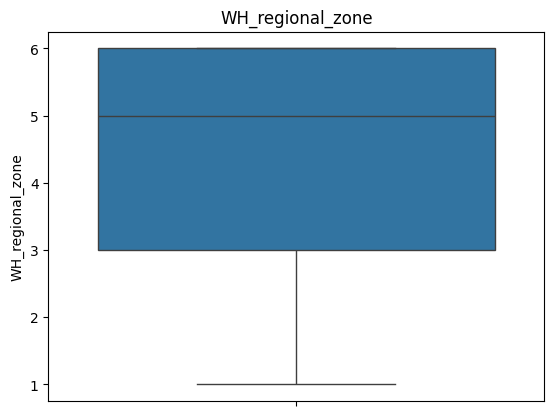

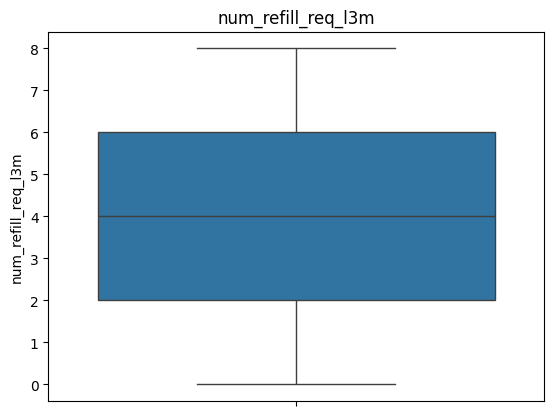

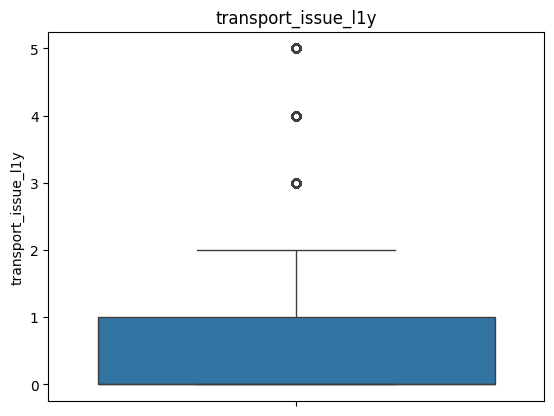

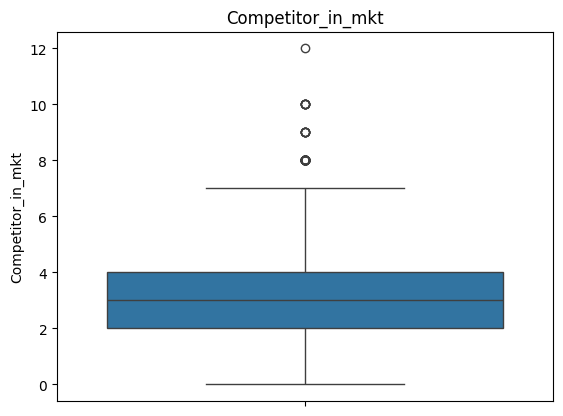

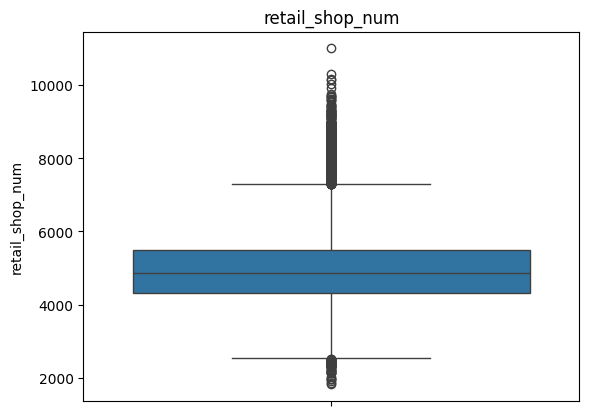

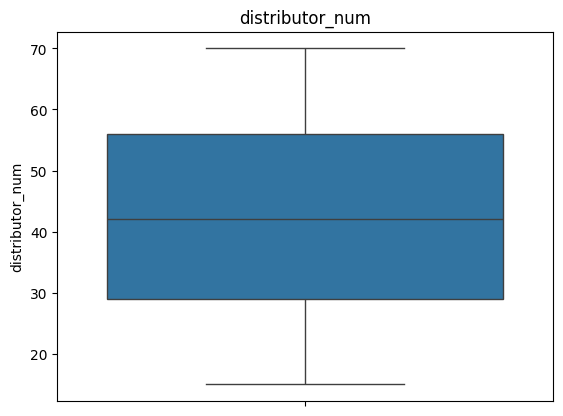

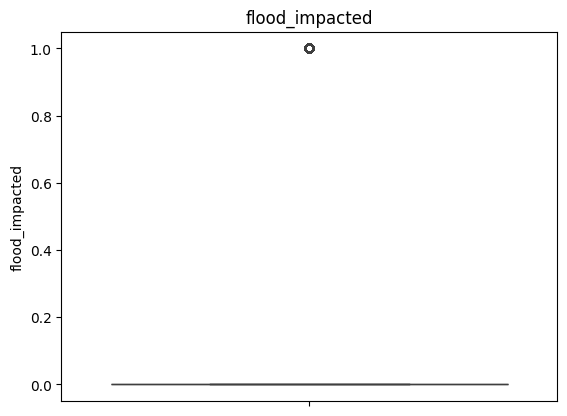

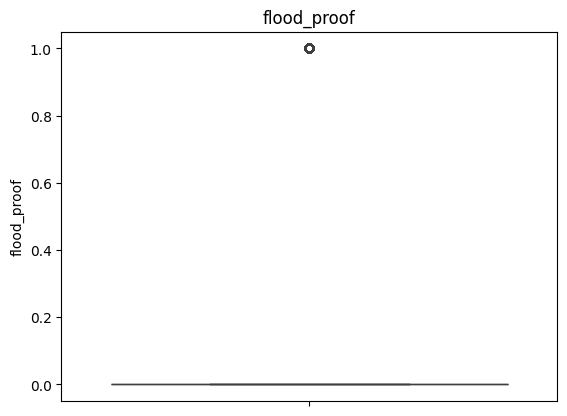

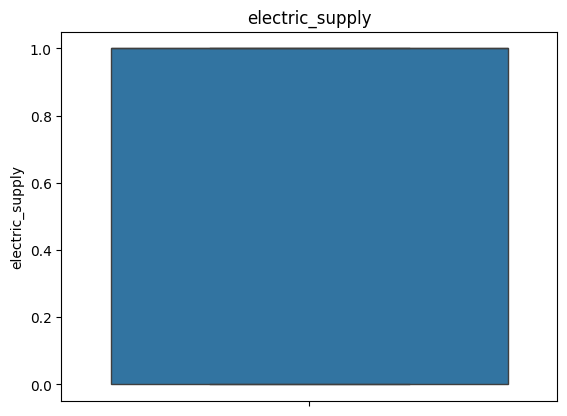

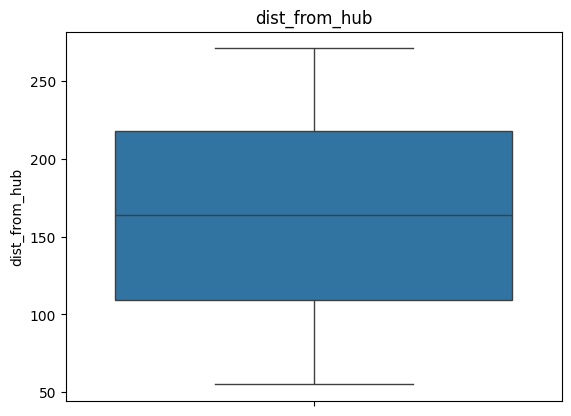

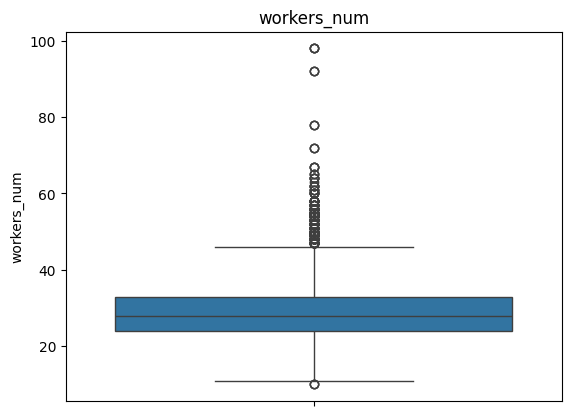

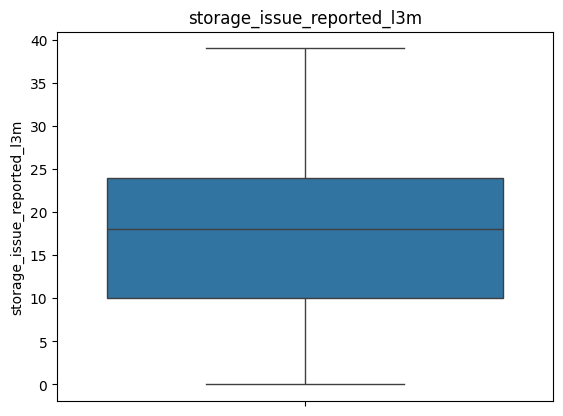

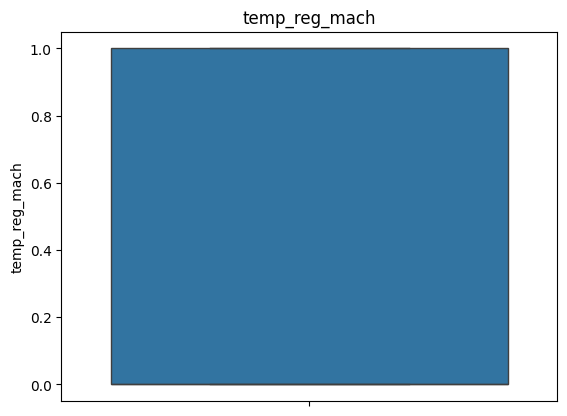

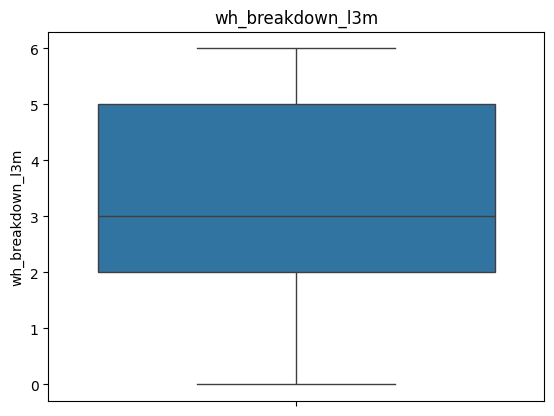

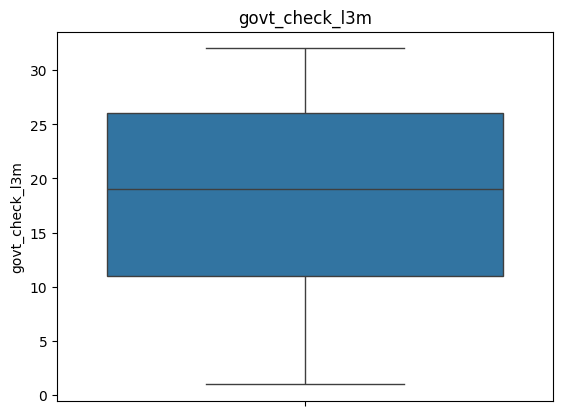

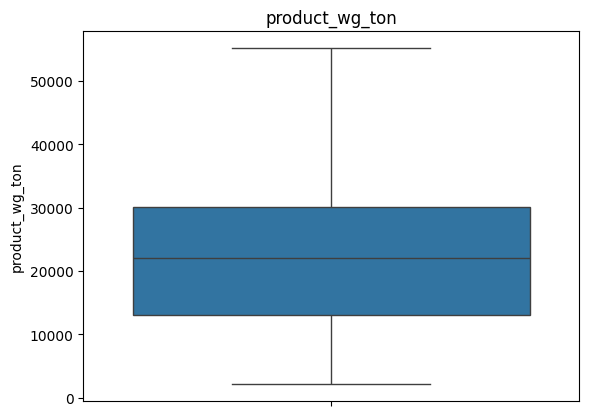

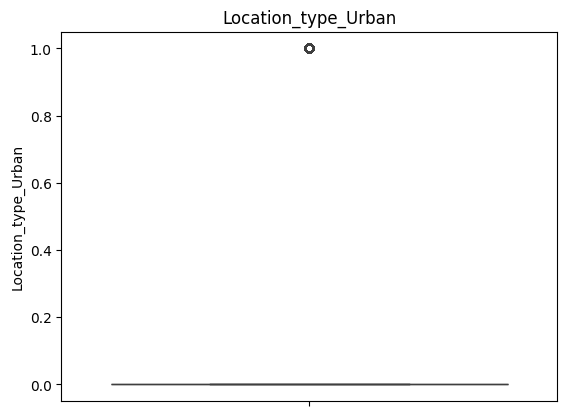

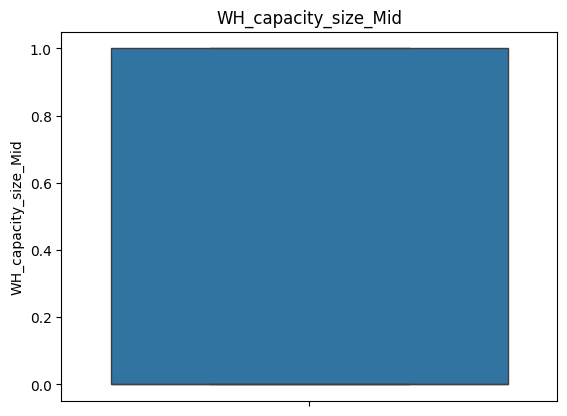

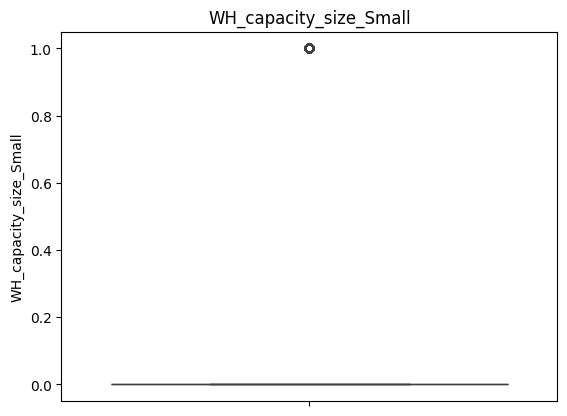

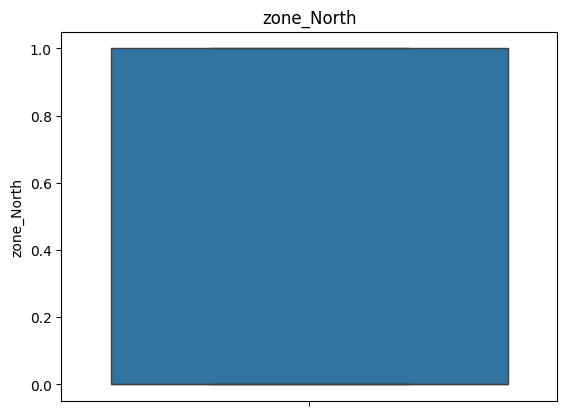

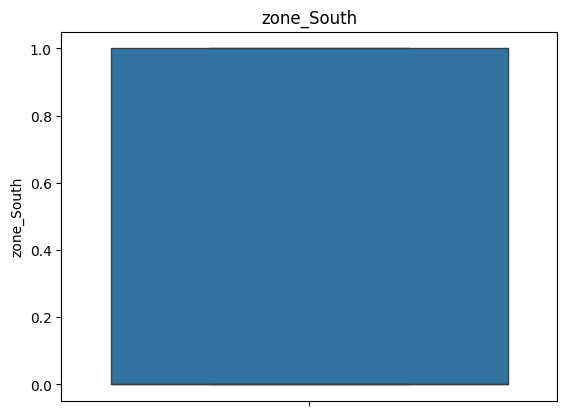

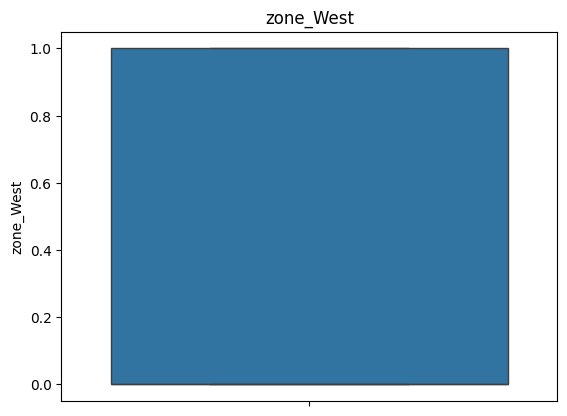

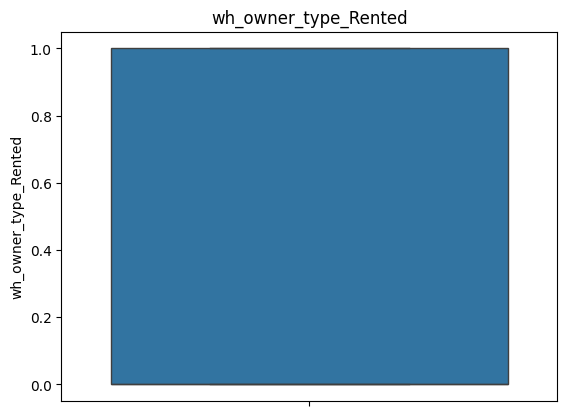

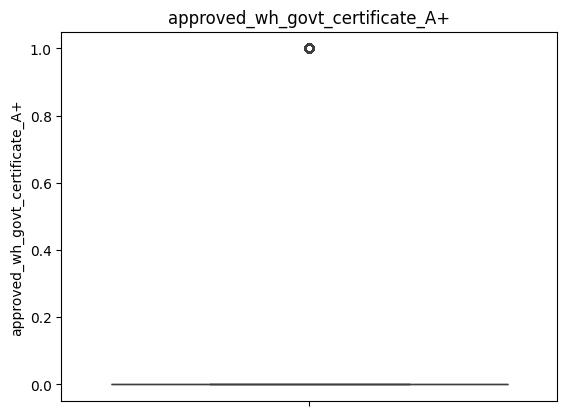

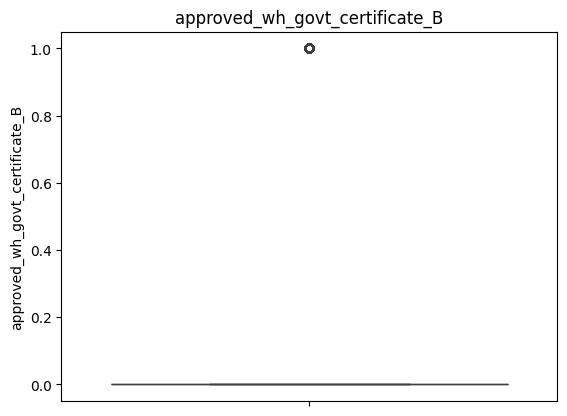

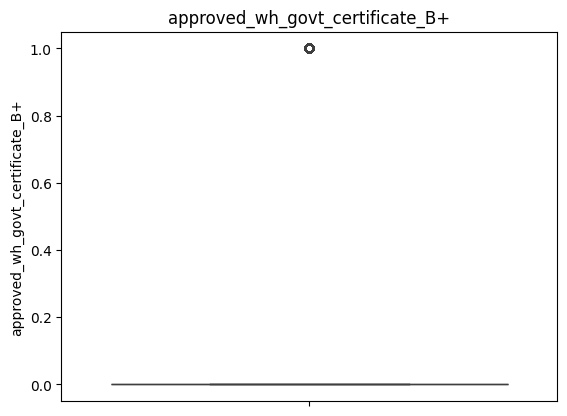

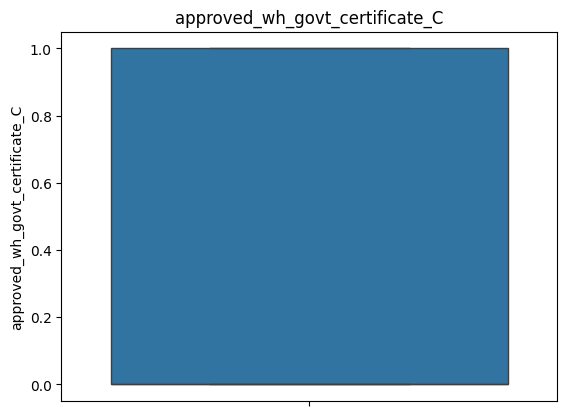

In [156]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.title(i)
    plt.show()

# splitting of dependent variables and independent variable

In [157]:
x = df1.drop(['product_wg_ton'],axis = 1)

In [158]:
y = df1['product_wg_ton']

# splitting data into train and test

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)


# standardaization

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [162]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [163]:
y_train

5244     52093
1984     13067
6728     32149
4400     30083
12415    37089
         ...  
2623     49101
12363    26064
5695     31151
8006     46126
13151    24133
Name: product_wg_ton, Length: 11634, dtype: int64

# MODEL BUILDING

In [164]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [165]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [166]:
models = {
    "Linear Regression": LinearRegression(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
     "Support Vector Machine (SVM)": SVR(kernel='linear')  
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    





Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1377.3098
- Mean Absolute Error: 1009.5091
- R2 Score: 0.9859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1438.0110
- Mean Absolute Error: 1023.9987
- R2 Score: 0.9848
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5501.2946
- Mean Absolute Error: 4359.7688
- R2 Score: 0.7750
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6691.9913
- Mean Absolute Error: 5311.9108
- R2 Score: 0.6710
Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1329.1683
- Mean Absolute Error: 884.4751
- R2 Score: 0.9870
Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 367.6723
- Mean Absolute Error

# overall results

In [167]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
3       Random Forest Regressor  0.992880
2                 Decision Tree  0.987021
0             Linear Regression  0.984809
4  Support Vector Machine (SVM)  0.914851
1         K-Neighbors Regressor  0.671011

# final model

In [168]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
random_forest = RandomForestRegressor(random_state=42)  # You can add hyperparameters if needed
random_forest.fit(x_train, y_train)

# Make predictions
y_train_pred_rf = random_forest.predict(x_train)

# Evaluate Train and Test dataset
model_train_mae_rf, model_train_rmse_rf, model_train_r2_rf = evaluate_model(y_train, y_train_pred_rf)
model_test_mae_rf, model_test_rmse_rf, model_test_r2_rf = evaluate_model(y_test, y_test_pred_rf)

print('Random Forest Regressor Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_rf))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_rf))
print("- R2 Score: {:.4f}".format(model_train_r2_rf))

print('----------------------------------')

print('Random Forest Regressor Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_rf))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_rf))
print("- R2 Score: {:.4f}".format(model_test_r2_rf))


Random Forest Regressor Model performance for Training set
- Root Mean Squared Error: 362.0133
- Mean Absolute Error: 268.6990
- R2 Score: 0.9990
----------------------------------
Random Forest Regressor Model performance for Test set
- Root Mean Squared Error: 979.7426
- Mean Absolute Error: 722.2469
- R2 Score: 0.9929


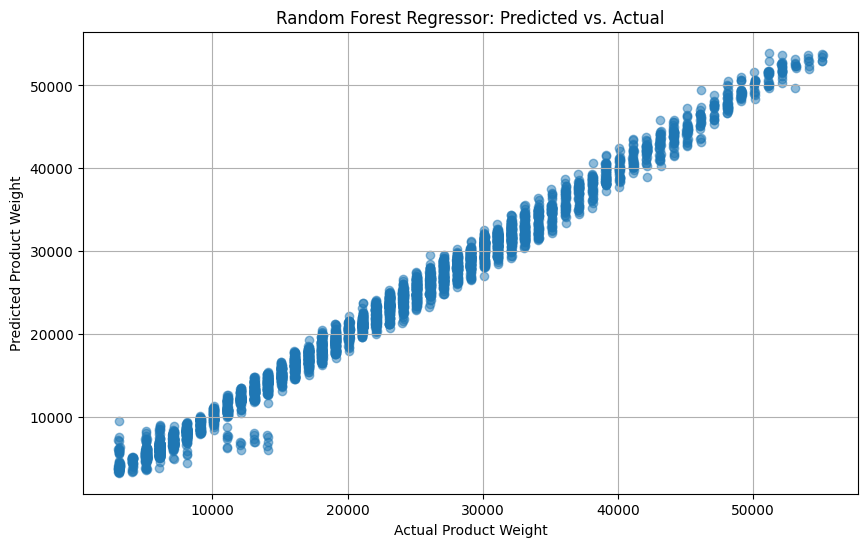

In [169]:
# Plot predicted vs. actual 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Random Forest Regressor: Predicted vs. Actual")
plt.grid(True)
plt.show()

# conclusion

In [227]:
test_data = pd.read_csv(r'supply_test.csv')
test_data.head()

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0       16621     WH_116621     EID_66621         Rural            Large   
1       16622     WH_116622     EID_66622         Rural            Large   
2       16623     WH_116623     EID_66623         Rural            Small   
3       16624     WH_116624     EID_66624         Rural              Mid   
4       16625     WH_116625     EID_66625         Urban              Mid   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0  North           Zone 5                   5                    0   
1  North           Zone 5                   5                    0   
2  North           Zone 6                   3                    0   
3   West           Zone 4                   5                    2   
4  North           Zone 4                   6                    0   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  3             5590  Company Owned               15   
1                  2             5856  Company Owned               40   
2                  3             4803         Rented               40   
3                  2             4784         Rented               15   
4                  4             3699         Rented               24   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            0                0            156         30.0   
1               0            0                1             79         31.0   
2               0            0                1             70         41.0   
3               0            0                1            255         33.0   
4               0            0                0            205         20.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0       2006.0                          24              0   
1       2019.0                           5              1   
2       2008.0                          19              1   
3       2017.0                           9              1   
4       1999.0                          25              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 2               5   
1                            C                 2              24   
2                           A+                 5               9   
3                           A+                 3              11   
4                            B                 4              26   

   product_wg_ton  
0           30132  
1            6075  
2           24076  
3           13092  
4           29071

In [228]:
test_data.drop(['Ware_house_ID','WH_Manager_ID','Unnamed: 0'],axis=1, inplace=True)


In [229]:
test_data.head()

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Rural            Large  North           Zone 5                   5   
1         Rural            Large  North           Zone 5                   5   
2         Rural            Small  North           Zone 6                   3   
3         Rural              Mid   West           Zone 4                   5   
4         Urban              Mid  North           Zone 4                   6   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    0                  3             5590  Company Owned   
1                    0                  2             5856  Company Owned   
2                    0                  3             4803         Rented   
3                    2                  2             4784         Rented   
4                    0                  4             3699         Rented   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               15               0            0                0   
1               40               0            0                1   
2               40               0            0                1   
3               15               0            0                1   
4               24               0            0                0   

   dist_from_hub  workers_num  wh_est_year  storage_issue_reported_l3m  \
0            156         30.0       2006.0                          24   
1             79         31.0       2019.0                           5   
2             70         41.0       2008.0                          19   
3            255         33.0       2017.0                           9   
4            205         20.0       1999.0                          25   

   temp_reg_mach approved_wh_govt_certificate  wh_breakdown_l3m  \
0              0                            A                 2   
1              1                            C                 2   
2              1                           A+                 5   
3              1                           A+                 3   
4              0                            B                 4   

   govt_check_l3m  product_wg_ton  
0               5           30132  
1              24            6075  
2               9           24076  
3              11           13092  
4              26           29071

In [230]:
test_data.drop(['wh_est_year'],axis=1,inplace=True)

In [231]:
test_data.approved_wh_govt_certificate.fillna(test_data.approved_wh_govt_certificate.mode()[0],inplace=True)

In [232]:
test_data.workers_num.fillna(test_data.workers_num.mean(),inplace=True)

In [233]:
test_data.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [234]:
df["Location_type"] = df["Location_type"].astype('category')
df["WH_capacity_size"] = df["WH_capacity_size"].astype('category')
df["zone"] = df["zone"].astype('category')
df["WH_regional_zone"] = df["WH_regional_zone"].astype('category')
df["wh_owner_type"] = df["wh_owner_type"].astype('category')
df["approved_wh_govt_certificate"] = df["approved_wh_govt_certificate"].astype('category')

In [235]:

test_data['WH_regional_zone' ]=test_data['WH_regional_zone'].apply(lambda x: x[-1],)
test_data.WH_regional_zone=pd.to_numeric(test_data.WH_regional_zone)

In [236]:
cat_types_features_test = df.select_dtypes(include = 'category')
cat_types_features_test.columns 

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')

In [237]:
cat_list_test = ['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate']
cat_list_test

['Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [238]:
test_data1 = pd.get_dummies(test_data,columns = cat_list,prefix = cat_list,drop_first = True)
test_data1.head(2)

WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                 5                   5                    0   
1                 5                   5                    0   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  3             5590               15               0   
1                  2             5856               40               0   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            0                0            156         30.0   
1            0                1             79         31.0   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                          24              0                 2   
1                           5              1                 2   

   govt_check_l3m  product_wg_ton  Location_type_Urban  WH_capacity_size_Mid  \
0               5           30132                False                 False   
1              24            6075                False                 False   

   WH_capacity_size_Small  zone_North  zone_South  zone_West  \
0                   False        True       False      False   
1                   False        True       False      False   

   wh_owner_type_Rented  approved_wh_govt_certificate_A+  \
0                 False                            False   
1                 False                            False   

   approved_wh_govt_certificate_B  approved_wh_govt_certificate_B+  \
0                           False                            False   
1                           False                            False   

   approved_wh_govt_certificate_C  
0                           False  
1                            True

In [239]:
boolean_columns_test = ['Location_type_Urban', 'WH_capacity_size_Mid', 'WH_capacity_size_Small',
                   'zone_North', 'zone_South', 'zone_West', 'wh_owner_type_Rented',
                   'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
                   'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C']

# Convert boolean columns to binary (0/1) columns
test_data1[boolean_columns] = test_data1[boolean_columns].astype(int)

In [240]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 5529 non-null   int64  
 1   num_refill_req_l3m               5529 non-null   int64  
 2   transport_issue_l1y              5529 non-null   int64  
 3   Competitor_in_mkt                5529 non-null   int64  
 4   retail_shop_num                  5529 non-null   int64  
 5   distributor_num                  5529 non-null   int64  
 6   flood_impacted                   5529 non-null   int64  
 7   flood_proof                      5529 non-null   int64  
 8   electric_supply                  5529 non-null   int64  
 9   dist_from_hub                    5529 non-null   int64  
 10  workers_num                      5529 non-null   float64
 11  storage_issue_reported_l3m       5529 non-null   int64  
 12  temp_reg_mach       

In [241]:
df1.shape

(16620, 27)

In [242]:
test_data1.shape

(5529, 27)

In [243]:
test_data1

WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                    5                   5                    0   
1                    5                   5                    0   
2                    6                   3                    0   
3                    4                   5                    2   
4                    4                   6                    0   
...                ...                 ...                  ...   
5524                 6                   8                    1   
5525                 6                   3                    1   
5526                 6                   7                    2   
5527                 6                   6                    2   
5528                 4                   7                    2   

      Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                     3             5590               15               0   
1                     2             5856               40               0   
2                     3             4803               40               0   
3                     2             4784               15               0   
4                     4             3699               24               0   
...                 ...              ...              ...             ...   
5524                  3             5030               46               0   
5525                  3             4320               60               0   
5526                  2             5268               64               0   
5527                  4             4378               32               0   
5528                  9             3626               50               1   

      flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0                0            156    30.000000   
1               0                1             79    31.000000   
2               0                1             70    41.000000   
3               0                1            255    33.000000   
4               0                0            205    20.000000   
...           ...              ...            ...          ...   
5524            0                1            203    28.000000   
5525            0                0            170    29.010528   
5526            0                0             99    22.000000   
5527            0                0            220    17.000000   
5528            0                1            104    36.000000   

      storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                             24              0                 2   
1                              5              1                 2   
2                             19              1                 5   
3                              9              1                 3   
4                             25              0                 4   
...                          ...            ...               ...   
5524                          22              1                 2   
5525                          26              0                 5   
5526                          20              0                 6   
5527                          13              0                 3   
5528                          11              0                 6   

      govt_check_l3m  product_wg_ton  Location_type_Urban  \
0                  5           30132                    0   
1                 24            6075                    0   
2                  9           24076                    0   
3                 11           13092                    0   
4                 26           29071                    1   
...              ...             ...                  ...   
5524               4           29138                    0   
5525               9           33108                    0   
5526               4           24072                    0   
5527              28           15055        

In [249]:
x1 = test_data1.drop(['product_wg_ton'],axis = 1)
x1

WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                    5                   5                    0   
1                    5                   5                    0   
2                    6                   3                    0   
3                    4                   5                    2   
4                    4                   6                    0   
...                ...                 ...                  ...   
5524                 6                   8                    1   
5525                 6                   3                    1   
5526                 6                   7                    2   
5527                 6                   6                    2   
5528                 4                   7                    2   

      Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                     3             5590               15               0   
1                     2             5856               40               0   
2                     3             4803               40               0   
3                     2             4784               15               0   
4                     4             3699               24               0   
...                 ...              ...              ...             ...   
5524                  3             5030               46               0   
5525                  3             4320               60               0   
5526                  2             5268               64               0   
5527                  4             4378               32               0   
5528                  9             3626               50               1   

      flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0                0            156    30.000000   
1               0                1             79    31.000000   
2               0                1             70    41.000000   
3               0                1            255    33.000000   
4               0                0            205    20.000000   
...           ...              ...            ...          ...   
5524            0                1            203    28.000000   
5525            0                0            170    29.010528   
5526            0                0             99    22.000000   
5527            0                0            220    17.000000   
5528            0                1            104    36.000000   

      storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                             24              0                 2   
1                              5              1                 2   
2                             19              1                 5   
3                              9              1                 3   
4                             25              0                 4   
...                          ...            ...               ...   
5524                          22              1                 2   
5525                          26              0                 5   
5526                          20              0                 6   
5527                          13              0                 3   
5528                          11              0                 6   

      govt_check_l3m  Location_type_Urban  WH_capacity_size_Mid  \
0                  5                    0                     0   
1                 24                    0                     0   
2                  9                    0                     0   
3                 11                    0                     1   
4                 26                    1                     1   
...              ...                  ...                   ...   
5524               4                    0                     0   
5525               9                    0                     0   
5526               4                    0          

In [250]:
y1 = test_data1['product_wg_ton']

In [252]:
predicted = random_forest.predict(x1)
predicted

array([52104.06, 52053.09, 52263.83, ..., 48491.63, 48829.25, 52122.96],
      shape=(5529,))

In [ ]:
score01  =predicted.score()


In [253]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 5529 non-null   int64  
 1   num_refill_req_l3m               5529 non-null   int64  
 2   transport_issue_l1y              5529 non-null   int64  
 3   Competitor_in_mkt                5529 non-null   int64  
 4   retail_shop_num                  5529 non-null   int64  
 5   distributor_num                  5529 non-null   int64  
 6   flood_impacted                   5529 non-null   int64  
 7   flood_proof                      5529 non-null   int64  
 8   electric_supply                  5529 non-null   int64  
 9   dist_from_hub                    5529 non-null   int64  
 10  workers_num                      5529 non-null   float64
 11  storage_issue_reported_l3m       5529 non-null   int64  
 12  temp_reg_mach       